<h1><center>DSA 4212: Year 2022</center></h1>
<h3><center> Assignment 2 (Deadline: Sunday 17th April at 23:59) </center></h3>
<h4><center> Group Number: 03 </center></h4>
<h4><center> Group Member 1: Li Zhuoran, A0194510L </center></h4>
<h4><center> Group Member 2: Pan Yuting, A0201267N </center></h4>
<h4><center> Group Member 3: Zhang Simian, A0204709H </center></h4>
<h4><center> Group Member 4: Zhong Zhaoping, A0194519U </center></h4>

In [106]:
import sys
import os
import pandas as pd
import gzip
import bz2
import numpy as np
import jax
import jax.numpy as jnp
import time
import pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from jax.config import config
config.update("jax_enable_x64", True) # for higher accuracy
config.update("jax_platform_name", 'cpu') # use cpu if needed

## Covtype: https://archive.ics.uci.edu/ml/datasets/covertype

In [107]:
covtype_path = "data/covtype.data.gz"

covtype_np = np.loadtxt(covtype_path, delimiter=',')
print(covtype_np.shape)

(581012, 55)


In [108]:
covtype_feature = covtype_np[:,:-1]
covtype_label = covtype_np[:,-1].reshape(-1,1).astype(int)
covtype_label = covtype_label - 1

print(covtype_feature.shape)
print(covtype_label.shape)

(581012, 54)
(581012, 1)


In [109]:
print(pd.DataFrame(np.unique(covtype_label, return_counts=True)).T)

   0       1
0  0  211840
1  1  283301
2  2   35754
3  3    2747
4  4    9493
5  5   17367
6  6   20510


In [110]:
covtype_feature_train, covtype_feature_test, covtype_label_train, covtype_label_test = \
    train_test_split(covtype_feature, covtype_label, random_state=4212)

In [111]:
print(covtype_feature_train.shape)
print(covtype_label_train.shape)
print(covtype_feature_test.shape)
print(covtype_label_test.shape)

(435759, 54)
(435759, 1)
(145253, 54)
(145253, 1)


In [112]:
covtype_df = pd.DataFrame(covtype_feature)

covtype_df.iloc[:,:10].describe()

,0,1,2,3,4,5,6,7,8,9
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [113]:
num_attribs = np.arange(0,10,1)
cat_attribs = np.arange(10,54,1)

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
    ],remainder='passthrough')

covtype_feature_train_norm = full_pipeline.fit_transform(covtype_feature_train)
covtype_feature_test_norm = full_pipeline.transform(covtype_feature_test)
print(covtype_feature_train_norm.shape)
print(covtype_feature_test_norm.shape)

(435759, 54)
(145253, 54)


## IJCNN https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary.html#ijcnn1

In [114]:
from sklearn.datasets import load_svmlight_file

filepath = 'data/ijcnn1.tr.bz2'
ijcnn_train_data, ijcnn_train_label = load_svmlight_file(filepath)
filepath = 'data/ijcnn1.val.bz2'
ijcnn_val_data, ijcnn_val_label = load_svmlight_file(filepath)
filepath = 'data/ijcnn1.t.bz2'
ijcnn_test_data, ijcnn_test_label = load_svmlight_file(filepath)

ijcnn_train_data = ijcnn_train_data.toarray()
ijcnn_val_data = ijcnn_val_data.toarray()
ijcnn_test_data = ijcnn_test_data.toarray()

In [115]:
temp = np.concatenate((ijcnn_train_data, ijcnn_val_data))
temp_label = np.concatenate((ijcnn_train_label, ijcnn_val_label))
ijcnn_train_data = temp
ijcnn_train_label = temp_label

In [116]:
ijcnn_train_label = ijcnn_train_label.astype(int)
ijcnn_test_label = ijcnn_test_label.astype(int)
ijcnn_train_label = (ijcnn_train_label+1) // 2
ijcnn_test_label = (ijcnn_test_label+1) // 2

In [117]:
print(ijcnn_train_data.shape)
print(ijcnn_train_label.shape)
print(ijcnn_test_data.shape)
print(ijcnn_test_label.shape)

(49990, 22)
(49990,)
(91701, 22)
(91701,)


In [118]:
print(ijcnn_train_data.max())
print(ijcnn_train_data.min())
# Already Scaled

1.0
-0.930435


## MNIST: http://yann.lecun.com/exdb/mnist/

In [119]:
def training_images():
    with gzip.open('data/train-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def training_labels():
    with gzip.open('data/train-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels.reshape(-1,1)
    
def test_images():
    with gzip.open('data/t10k-images-idx3-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8)\
            .reshape((image_count, row_count, column_count))
        return images


def test_labels():
    with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels.reshape(-1,1)

In [120]:
mnist_train_images = training_images()
mnist_train_labels = training_labels()
print(mnist_train_images.shape)
print(mnist_train_labels.shape)

(60000, 28, 28)
(60000, 1)


In [121]:
mnist_test_images = test_images()
mnist_test_labels = test_labels()
print(mnist_test_images.shape)
print(mnist_test_labels.shape)

(10000, 28, 28)
(10000, 1)


In [122]:
print(pd.DataFrame(np.unique(mnist_train_labels, return_counts=True)).T)

   0     1
0  0  5923
1  1  6742
2  2  5958
3  3  6131
4  4  5842
5  5  5421
6  6  5918
7  7  6265
8  8  5851
9  9  5949


In [123]:
print(np.max(mnist_train_images))
print(np.max(mnist_test_images))

255
255


In [124]:
mnist_train_images = mnist_train_images / 255.
mnist_test_images = mnist_test_images / 255.

## Adult: https://archive.ics.uci.edu/ml/datasets/adult

In [125]:
adult_train = "data/adult.data"
adult_test = "data/adult.test"
adult_train_df = pd.read_csv(adult_train, header=None)
adult_test_df = pd.read_csv(adult_test, index_col=None)
adult_test_df = adult_test_df.reset_index()

In [126]:
adult_col_names = ['age','workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation','relationship','race','sex','capital-gain','capital-loss', 'hours-per-week','native-country', 'salary']
adult_train_df.columns = adult_col_names
adult_test_df.columns = adult_col_names

In [127]:
adult_feature_train = adult_train_df.iloc[:,:-1] 
adult_label_train = adult_train_df.iloc[:,-1]
adult_feature_test = adult_test_df.iloc[:,:-1]
adult_label_test = adult_test_df.iloc[:,-1]

In [128]:
print(adult_feature_train.shape)
print(adult_label_train.shape)
print(adult_feature_test.shape)
print(adult_label_test.shape)

(32561, 14)
(32561,)
(16281, 14)
(16281,)


In [129]:
adult_feature_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [130]:
print(pd.DataFrame(np.unique(adult_label_train, return_counts=True)).T)
print(pd.DataFrame(np.unique(adult_label_test, return_counts=True)).T)

        0      1
0   <=50K  24720
1    >50K   7841
         0      1
0   <=50K.  12435
1    >50K.   3846


In [131]:
adult_feature_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [132]:
num_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'int64']
cat_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'object']
print(num_attribs)
print(cat_attribs)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')


In [133]:
num_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'int64']
cat_attribs = adult_feature_train.columns[adult_feature_train.dtypes == 'object']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])

adult_feature_train_norm = full_pipeline.fit_transform(adult_feature_train)
adult_feature_train_norm = adult_feature_train_norm.toarray()
adult_feature_test_norm = full_pipeline.transform(adult_feature_test)
adult_feature_test_norm = adult_feature_test_norm.toarray()

print(adult_feature_train_norm.shape)
print(adult_feature_test_norm.shape)

(32561, 108)
(16281, 108)


In [134]:
n_train = adult_label_train.shape[0]
n_test = adult_label_test.shape[0]
adult_label_train_bi = np.zeros(n_train)
adult_label_test_bi = np.zeros(n_test)

adult_label_train_bi[adult_label_train == adult_label_train.unique()[1]] = 1
adult_label_test_bi[adult_label_test == adult_label_test.unique()[1]] = 1
adult_label_train_bi = adult_label_train_bi.astype(int)
adult_label_test_bi = adult_label_test_bi.astype(int)
print(pd.DataFrame(np.unique(adult_label_train_bi, return_counts=True)).T)
print(pd.DataFrame(np.unique(adult_label_test_bi, return_counts=True)).T)

   0      1
0  0  24720
1  1   7841
   0      1
0  0  12435
1  1   3846


# Utility Functions

## Common Utility

In [135]:
@jax.jit
def pred_proba(beta, x):
    """ predict the probability vector of x belonging to each class """
    scores = beta@x
    return jnp.exp(scores) / jnp.sum(jnp.exp(scores))

pred_proba_batch = jax.vmap(pred_proba, in_axes=(None, 0)) # Vectorize Predict Function

In [136]:
@jax.jit
def get_label(p):
    pred_label = jnp.argmax(p)
    return pred_label

def get_label_batch(P):
    labels = jax.vmap(get_label,in_axes=[0])(P)
    return labels.reshape(-1,1)
# get_label_batch = jax.vmap(get_label,in_axes=[0])

def get_accuracy(pred_labels, Y):
    """ Compare the predicted probability (p) with the ground truth labels (Y) to get the accuracy """
    return jnp.mean(Y==pred_labels)

def test_acc(beta,test_label, test_data):
    # Memory Problem
    N = test_label.shape[0]
    bs = 100
    
    running_acc=0
    n_mb=0
    
    for i in range(0,N,bs):
        mb_data = test_data[i:i+bs]
        mb_label = test_label[i:i+bs]
        
        mb_pred = pred_proba_batch(beta, mb_data)
        mb_pred_labels = get_label_batch(mb_pred)
        mb_acc = get_accuracy(mb_pred_labels, mb_label)
        
        running_acc += mb_acc
        n_mb += 1
    
    # test_acc = jnp.dot(running_acc, batch_sizes) / jnp.sum(batch_sizes)
    test_acc = running_acc / n_mb
        
    # test_pred = pred_proba_batch(beta, test_data)
    # test_acc = get_accuracy(test_pred, Y_true)
    return test_acc

## Graph Plotting

In [137]:
def record_graph(record_list, key='test_acc_epoch', title="Summary of Results", alpha=0.6, n = None):
    """
    Plot graph of records in the list
    
    Args:
     record_list: List of record (dictionary) as returned by model training functions
     key: Performance metric to be plotted
     n: Number of results to be plotted, full results will be plotted if None
     
    Output:
     Multiple lines of the record on the same graph
    """
    keys = record_list[0].keys()
    if key not in keys:
        print(f'{key} is an invalid key!')
        print(f'Please enter one of the following: {keys}')
        
    plt.figure(figsize=(16,10))
        
    for record in record_list:
        if n == None:
            n = len(record.get(key))
        y = record.get(key)[:n]
        x = np.arange(1,n+1)

        labels = record.get('name')
        # if 'var' in key:
        #     labels = ["grad_" + str(i) for i in range(y[0].shape[0])]
            
        plt.plot(x,
                 y, 
                 "-.",
                 alpha=alpha,
                 label=labels)
        plt.xticks(range(1,n+1))
    
    plt.legend()
    plt.xlabel(f'{key}'.split('_')[-1])
    plt.ylabel(' '.join(f'{key}'.split('_')[:-1]))
    plt.grid(True)
    plt.title(title)

## Multi-Class Logistic Regression

In [138]:
# Multi-Class Logistic Regression Loss
@jax.jit
def loss_single(beta, x, y):
    """
     Loss of a single data in multi-class Logistic Regression
    input:
     beta: Model parameters of shape [n, p], n = number of classes for label, p = dimension of features
     x: feature variables of shape p
     y: label, a single number indicating which class the data belongs to 
    """
    scores = beta@x
    scores = jnp.exp(scores) / jnp.sum(jnp.exp(scores)) # Softmax
    
    # scores = jax.nn.softmax(scores) # Softmax
    loss = -jnp.log(scores[y]) # Negative Loglikelihood of True Class
    return loss
    
loss_batch = jax.vmap(loss_single,in_axes=[None, 0, 0]) # Vectorize

def loss_LR(beta, X, Y):
    return jnp.mean(loss_batch(beta, X, Y))

def loss_LR_single(beta, x, y):
    loss = loss_single(beta, x, y)
    if loss.shape == ():
        return loss
    return loss[0]

In [139]:
# With L2-regularisation
@jax.jit
def loss_LR_l2(beta, X, Y, c=0.01):
    return jnp.mean(loss_batch(beta, X, Y)) + c*jnp.sum(beta**2)

def loss_LR_single_l2(beta, x, y, c=0.01):
    loss = loss_single(beta, x, y)
    if loss.shape == ():
        return loss + c*jnp.sum(beta**2)
    return loss[0] + c*jnp.sum(beta**2)

In [140]:
# compute derivates
loss_LR_grad = jax.jit(jax.grad(loss_LR, argnums=0))
loss_LR_values_and_grad = jax.jit(jax.value_and_grad(loss_LR, argnums=0))

loss_LR_single_grad = jax.jit(jax.grad(loss_LR_single, argnums=0))
loss_LR_single_values_and_grad = jax.jit(jax.value_and_grad(loss_LR_single, argnums=0))

loss_LR_l2_grad = jax.jit(jax.grad(loss_LR_l2, argnums=0))
loss_LR_single_l2_grad = jax.jit(jax.grad(loss_LR_single_l2, argnums=0))

# SGD Algos

## 1. Basic SGD

To calculate variance of gradient estimates: https://stats.stackexchange.com/questions/244352/variance-of-gradient-as-e-g-in-sgd

In [141]:
def train_SGD_single(train_data, train_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD) with Single Data per update of gradient
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_update', 'test_acc_update', 'grad_var_update'
    """
    N = len(train_data)  # total number of data
    img_indices = np.arange(N)

    loss_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):
        # randomize the batches
        idx = np.random.randint(0,N)

        X = train_data[idx]
        Y = train_label[idx]

        # compute the stochastic gradient
        grad = grad_fn(beta, X, Y)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SGD
        beta = beta - learning_rate*grad
            
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.4f}")
            
    record = {'name': "SGD",
              'loss_#Grad/n': loss_history_n}
    
    return beta, record

In [142]:
def train_SGD(train_data, train_label, test_data, test_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, mb_size=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD)
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     mb_size: Minibatch size, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_epoch', 'loss_mb', 'test_acc_epoch', 'test_acc_mb', 'grad_var,mb'
    """
    minibatch_size = mb_size #size of the minibatchs
    N = len(train_data) // minibatch_size + 1  #total number of minibatches
    img_indices = np.arange(len(train_data))

    loss_history_n = []
    test_acc_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):

        # all_loss_within_epoch = []
        # all_acc_within_epoch = []
        # for k in range(n_minibatch):
            # create the minibatch of examples
            
        k = np.random.randint(0, N) # which minibatch to use
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % len(train_data)
        batch_indices = img_indices[batch_indices]

        X_minibatch = train_data[batch_indices]
        Y_minibatch = train_label[batch_indices]

        # compute the stochastic gradient
        grad = grad_fn(beta, X_minibatch, Y_minibatch)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SGD
        beta = beta - learning_rate*grad

            
#         loss_epoch = np.mean(all_loss_within_epoch)
#         loss_history_epoch.append(loss_epoch)
        
#         test_acc_epoch = np.mean(all_acc_within_epoch)
#         test_acc_history_epoch.append(test_acc_epoch)
        
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            
            test_acc_new = test_acc(beta, test_label, test_data)
            test_acc_history_n.append(test_acc_new)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.4f}, Test Accuracy: {test_acc_new:.4f}")
            
    record = {'name': "SGD",
              'loss_#Grad/n': loss_history_n,
              'test_acc_#Grad/n': test_acc_history_n}
    
    return beta, record

## 2. SAG

In [143]:
def train_SAG_single(train_data, train_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Average Gradient (SAG) with Single Data per update of gradient
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_update', 'test_acc_update', 'grad_var_update'
    """
    N = len(train_data)  # total number of data
    img_indices = np.arange(N)

    loss_history_n = []
    loss_history_per_pass = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    grad_store = np.zeros((N,beta.shape[0],beta.shape[1]))
    d = np.zeros(beta.shape)
    
    np.random.seed(random_state)
    
    visited = np.zeros(N)

    start = time.time()
    for run in range(n_run*N):
        # randomize the batches
        idx = np.random.randint(0,N)

        X = train_data[idx]
        Y = train_label[idx]
        
        # compute the stochastic gradient
        grad = grad_fn(beta, X, Y)
        
        visited[idx] = 1
        
        #loss = loss_LR_single(beta, X, Y)
        #loss_history_per_pass.append(loss)
        
        d = d - grad_store[idx] + grad
        grad_store[idx] = grad
        

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SAG
        m = visited.sum()
        beta = beta - learning_rate*d/m
            
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.4f}")
            
    record = {'name': "SAG",
              'loss_#Grad/n': loss_history_n}
    
    return beta, record

In [144]:
def train_SAG(train_data, train_label, test_data, test_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, mb_size=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Average Gradient (SAG)
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     mb_size: Minibatch size, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_epoch', 'loss_mb', 'test_acc_epoch', 'test_acc_mb', 'grad_var,mb'
    """
    minibatch_size = mb_size #size of the minibatchs
    N = len(train_data) // minibatch_size + 1  #total number of minibatches
    img_indices = np.arange(len(train_data))

    loss_history_n = []
    loss_history_per_pass = []
    test_acc_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    grad_store = np.zeros((N,beta.shape[0],beta.shape[1]))
    d = np.zeros(beta.shape)
    visited = np.zeros(N)
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):

        # all_loss_within_epoch = []
        # all_acc_within_epoch = []
        # for k in range(n_minibatch):
            # create the minibatch of examples
            
        k = np.random.randint(0, N) # which minibatch to use
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % len(train_data)
        batch_indices = img_indices[batch_indices]

        X_minibatch = train_data[batch_indices]
        Y_minibatch = train_label[batch_indices]
        
        visited[k] = 1
        
        # compute the stochastic gradient
        grad = grad_fn(beta, X_minibatch, Y_minibatch)

        d = d - grad_store[k] + grad
        grad_store[k] = grad

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do one step of SAG
        m = visited.sum()
        beta = beta - learning_rate*d / m
        


            
#         loss_epoch = np.mean(all_loss_within_epoch)
#         loss_history_epoch.append(loss_epoch)
        
#         test_acc_epoch = np.mean(all_acc_within_epoch)
#         test_acc_history_epoch.append(test_acc_epoch)
        
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            
            test_acc_new = test_acc(beta, test_label, test_data)
            test_acc_history_n.append(test_acc_new)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.4f}, Test Accuracy: {test_acc_new:.4f}")
            
    record = {'name': "SAG",
              'loss_#Grad/n': loss_history_n,
              'test_acc_#Grad/n': test_acc_history_n}
    
    return beta, record

## 3. SVRG

In [145]:
@jax.jit
def loss_single(beta, x, y):
    """
     Loss of a single data in multi-class Logistic Regression
    input:
     beta: Model parameters of shape [n, p], n = number of classes for label, p = dimension of features
     x: feature variables of shape p
     y: label, a single number indicating which class the data belongs to 
    """
    scores = beta@x
    scores = jnp.exp(scores) / jnp.sum(jnp.exp(scores)) # Softmax
    # scores = jax.nn.softmax(scores) # Softmax
    loss = -jnp.log(scores[y]) # Negative Loglikelihood of True Class
    return loss

loss_batch = jax.vmap(loss_single, in_axes=[None, 0, 0]) # Vectorize

@jax.jit
def loss_LR_SVRG(beta, X, Y, single=None):
    """
    Minibatch Logistic regression loss
    
    args:
    ====
     beta: LR parameter
     X: array[:,:] of images
     Y: array[:] of labels
    """
    if single is not None:
        X, Y = X[single], Y[single]
        losses = loss_single(beta, X, Y)

    if single is None:        
        # compute all the individual losses
        losses = loss_batch(beta, X, Y)

    return jnp.mean(losses)

# compute derivates
loss_LR_SVRG_grad = jax.jit(jax.grad(loss_LR_SVRG, argnums=0))
loss_LR_SVRG_values_and_grad = jax.jit(jax.value_and_grad(loss_LR_SVRG, argnums=0))

def train_SVRG(train_data, train_label, test_data, test_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, mb_size=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD)
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     mb_size: Minibatch size, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_epoch', 'loss_mb', 'test_acc_epoch', 'test_acc_mb', 'grad_var,mb'
    """
    minibatch_size = mb_size #size of the minibatchs
    N = len(train_data) // minibatch_size + 1  #total number of minibatches
    img_indices = np.arange(len(train_data))

    loss_history_n = []
    test_acc_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    m = 2*N ## m slightly larger than n
    count_n = 0
    grad_n = 0 
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)


    start = time.time()
    for run in range(n_run):

        # all_loss_within_epoch = []
        # all_acc_within_epoch = []
        # for k in range(n_minibatch):
        # create the minibatch of examples
            
        # k = np.random.randint(0, N) # which minibatch to use
        # batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % N
        # batch_indices = img_indices[batch_indices]

        # X_minibatch = train_data[batch_indices]
        # Y_minibatch = train_label[batch_indices]

        #
        v0 = beta
        v = np.copy(v0)

        # compute the stochastic gradient
        # grad = grad_fn(beta, X_minibatch, Y_minibatch)
        snapshot = grad_fn(v0, train_data, train_label)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        # new_grad_norm = jnp.linalg.norm(grad,axis=None)
        # sum_grad_norm_2 += new_grad_norm**2
        # sum_grad_norm += new_grad_norm
        # n_update += 1
        # new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        # grad_var.append(new_grad_var)

        # do m step of SGD
        for j in range(m):
            # i = np.random.randint(mb_size)
            i = np.random.randint(0, N) # which minibatch to use
            batch_indices = np.arange(i*minibatch_size, (i+1)*minibatch_size) % len(train_data)
            batch_indices = img_indices[batch_indices]

            X_minibatch = train_data[batch_indices]
            Y_minibatch = train_label[batch_indices]

            update_vec = grad_fn(v, X_minibatch, Y_minibatch) - grad_fn(v0, X_minibatch, Y_minibatch)+snapshot
            v -= lr*update_vec
            grad_n += 1


            if (grad_n+1)%N==0:
                beta_temp = v
                loss = loss_fn(beta_temp, train_data, train_label)
                loss_history_n.append(loss)
            
                test_acc_new = test_acc(beta_temp, test_label, test_data)
                test_acc_history_n.append(test_acc_new)
                if verbose == 1:
                    end = time.time()
                    duration = end - start
                    print(f"# Grad/N {count_n+1}: {duration:.2f} seconds, Loss: {loss:.4f}, Test Accuracy: {test_acc_new:.4f}")
                    count_n += 1

        beta = v


            
#         loss_epoch = np.mean(all_loss_within_epoch)
#         loss_history_epoch.append(loss_epoch)
        
#         test_acc_epoch = np.mean(all_acc_within_epoch)
#         test_acc_history_epoch.append(test_acc_epoch)
        
            
    record = {'name': "SVRG",
              'loss_#Grad/n': loss_history_n,
              'test_acc_#Grad/n': test_acc_history_n}
    
    return beta, record

In [146]:
def train_SVRG_single(train_data, train_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using Stochastic Gradient Descent (SGD) with Single Data per update of gradient
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     val_grad_fn: Function to return the loss value and gradient given X and Y
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of update of gradient, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss', 'test_acc', 'grad_var'
    """
    N = len(train_data)  # total number of data
    img_indices = np.arange(N)

    loss_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    m = 2*N ## m slightly larger than n
    count_n = 0
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run):
        # randomize the batches
        idx = np.random.randint(0,N)

        X = train_data[idx]
        Y = train_label[idx]

        # compute the stochastic gradient
        grad = grad_fn(beta, X, Y)

        # compute the variance of gradient E(||g||^2) - E(||g||)^2
        # new_grad_norm = jnp.linalg.norm(grad,axis=1) # Calc norm for each set of beta

        new_grad_norm = jnp.linalg.norm(grad,axis=None)
        sum_grad_norm_2 += new_grad_norm**2
        sum_grad_norm += new_grad_norm
        n_update += 1
        new_grad_var = sum_grad_norm_2 / n_update - (sum_grad_norm / n_update)**2
        grad_var.append(new_grad_var)

        v0 = beta
        v = np.copy(v0)
        snapshot = loss_LR_SVRG_grad(v0, train_data, train_label)

        # do m step of SGD
        for k in range(m):
            i = np.random.randint(N)
            grad_v = grad_fn(v, train_data[i], train_label[i])
            grad_v0 = grad_fn(v0, train_data[i], train_label[i])
            update_vec = grad_v - grad_v0 + snapshot
            v -= lr*update_vec

            if (k+1)%N==0:
                beta_temp = v
                loss = loss_fn(beta_temp, train_data, train_label)
                loss_history_n.append(loss)
                if verbose == 1:
                    end = time.time()
                    duration = end - start
                    print(f"# Grad/N {count_n+1}: {duration:.2f} seconds, Loss: {loss:.4f}")
                    count_n += 1

        beta = v

        # book-keeping
        # loss_history.append(val)

        # test_accuracy = test_acc(beta, test_label, test_data)
        # test_acc_history.append(test_accuracy)

    record = {'name': "SVRG", 'loss_#Grad/n': loss_history_n}
          
    
    return beta, record

## 4. SAGA

In [147]:
def train_SAGA_single(train_data, train_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, random_state=4212):
    """
     Find optimized beta given train images and train labels using SAGA with Single Data per update of gradient
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_update', 'test_acc_update', 'grad_var_update'
    """
    N = len(train_data)  # total number of data
    img_indices = np.arange(N)

    loss_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    # Calc norm for each set of beta
    # n_grad = beta_init.shape[0]
    # sum_grad_norm_2 = jnp.zeros(n_grad)
    # sum_grad_norm = jnp.zeros(n_grad)
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    grad_store = np.zeros((N,beta.shape[0],beta.shape[1]))
    summ_ = np.zeros(beta.shape)
    visited = np.zeros(N)
    
    """
    n, d = train_data.shape
    grad_memory = np.array([grad_fn(beta, train_data[i], train_label[i]) for i in range(n)]).reshape(n, -1)
    avg = 1/n * grad_memory.T @ np.ones(n)
    """
    np.random.seed(random_state)

    start = time.time()
    for run in range(n_run*N):
        # randomize the batches
        idx = np.random.randint(0,N)
        
        # compute gradient estimate
        grad_single = grad_fn(beta, train_data[idx], train_label[idx])
        increment = grad_single - grad_store[idx]
        grad_estimate = increment + summ_/(visited.sum()+1e-7)
        
        # take an update step
        beta = beta - learning_rate * grad_estimate
        
        # update gradient memory
        visited[idx] = 1
        grad_store[idx] = np.copy(grad_single)
        summ_ += increment
        
        """
        # compute the gradient of a single data point
        grad_idx = grad_fn(beta, train_data[idx], train_label[idx]).reshape(-1)
        # compute the gradient estimate g using new, old and memory gradients
    #             grad_estimate = 1/minibatch_size * (batch_grad - grad_memory[batch_indices]).T @ np.ones(minibatch_size) + \
    #             1/n * grad_memory.T @ np.ones(n)
        #grad_estimate = grad_idx - grad_memory[idx] + np.mean(grad_memory, axis=0)
        diff = grad_idx - grad_memory[idx]
        grad_estimate = diff + avg
        
        # update gradient memory and avg of memory
        avg += 1/n * diff
        grad_memory[idx] = np.copy(grad_idx)
        
        # take an update step
        grad_estimate = grad_estimate.reshape(beta_init.shape)
        beta = beta - learning_rate * grad_estimate
        """

            
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.4f}")
            
    record = {'name': "SAGA",
              'loss_#Grad/n': loss_history_n}
    
    return beta, record

In [148]:
def train_SAGA(train_data, train_label, test_data, test_label, beta_init, lr, loss_fn, grad_fn, verbose = 0, n_run=20, mb_size=100, random_state=4212):
    """
     Find optimized beta given train images and train labels using SAGA
     
    Inputs:
     train_img: Training images (in the format of [n,:] array, where n is the number of images)
     train_label: Training labels (in the format of [n, 1] array, where n is the number of labels)
     beta: Starting point of beta (weights)
     lr: Learning rate
     loss_fn: Function to return the loss value
     grad_fn: Function to return the gradient
     verbose: Print time elapsed, training loss and test accuracy for each epoch if verbose = 1, default 0
     n_run: Number of computation of gradient / n, default 100
     mb_size: Minibatch size, default 100
     
    Outputs:
     beta: The final updated values of beta
     record: A dictionary of performance during training, including 'loss_epoch', 'loss_mb', 'test_acc_epoch', 'test_acc_mb', 'grad_var,mb'
    """
    minibatch_size = mb_size #size of the minibatchs
    train_data_len = len(train_data)
    N = train_data_len // minibatch_size + 1  #total number of minibatches
    img_indices = np.arange(train_data_len)

    loss_history_n = []
    test_acc_history_n = []
    grad_var = []
    
    beta = np.copy(beta_init)
    learning_rate = lr
    
    sum_grad_norm_2 = 0
    sum_grad_norm = 0
    n_update = 0
    
    grad_store = np.zeros((N,beta.shape[0],beta.shape[1]))
    summ_ = np.zeros(beta.shape)
    visited = np.zeros(N)
    
    """
    n, d = train_data.shape
    grad_memory = np.array([grad_fn(beta, train_data[[i]], train_label[[i]]) for i in range(n)]).reshape(n, -1)
    avg = 1/n * grad_memory.T @ np.ones(n)
    """
    np.random.seed(random_state)
    
    start = time.time()
    for run in range(n_run*N):
            
        k = np.random.randint(0, N) # which minibatch to use
        batch_indices = np.arange(k*minibatch_size, (k+1)*minibatch_size) % train_data_len
        batch_indices = img_indices[batch_indices]
        
        X_minibatch = train_data[batch_indices]
        Y_minibatch = train_label[batch_indices]
        
        # compute gradient estimate
        grad_batch = grad_fn(beta, X_minibatch, Y_minibatch)
        increment = grad_batch - grad_store[k]
        grad_estimate = increment + summ_/(visited.sum()+1e-7)
        
        # take an update step
        beta = beta - learning_rate * grad_estimate
        
        # update gradient memory
        visited[k] = 1
        grad_store[k] = np.copy(grad_batch)
        summ_ += increment
        
        """
        # compute the gradients of the sample data points
        batch_grad = np.array([grad_fn(beta, train_data[[j]], train_label[[j]]) 
                               for j in batch_indices]).reshape(minibatch_size, -1)
        sum_diff = (batch_grad - grad_memory[batch_indices]).sum(axis=0)
        grad_estimate = 1/minibatch_size * sum_diff + avg
        
        # update gradient memory 
        avg += 1/n * sum_diff
        grad_memory[batch_indices] = np.copy(batch_grad)
        
        # take an update step
        grad_estimate = grad_estimate.reshape(beta_init.shape)
        beta = beta - learning_rate * grad_estimate
        """
        
        if (run+1)%N==0:
            loss = loss_fn(beta, train_data, train_label)
            loss_history_n.append(loss)
            
            test_acc_new = test_acc(beta, test_label, test_data)
            test_acc_history_n.append(test_acc_new)
            if verbose == 1:
                end = time.time()
                duration = end - start
                print(f"# Grad/N {(run+1)//N}: {duration:.2f} seconds, Loss: {loss:.4f}, Test Accuracy: {test_acc_new:.4f}")
            
    record = {'name': "SAGA",
              'loss_#Grad/n': loss_history_n,
              'test_acc_#Grad/n': test_acc_history_n}
    
    return beta, record

## Experiment with Covtype

In [149]:
train_data, test_data, train_label, test_label = covtype_feature_train_norm, covtype_feature_test_norm, covtype_label_train, covtype_label_test

In [150]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1, 2, 3, 4, 5, 6]), array([158988, 212405,  26835,   2064,   7091,  13016,  15360]))
(array([0, 1, 2, 3, 4, 5, 6]), array([52852, 70896,  8919,   683,  2402,  4351,  5150]))
(435759, 54)
(145253, 54)


In [151]:
# Test with Covtype
n_features = 54
n_classes = 7
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [152]:
beta_init.shape

(7, 54)

#### Optimal Results from Commercial Package

In [153]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(penalty='none', solver='lbfgs', max_iter=100)
# model.fit(train_data, np.ravel(train_label))

In [154]:
# beta_best = model.coef_
# loss_best = loss_LR(beta_best, train_data, train_label)
# print(loss_best)

### Single Version (Grad Var and Train Loss)

In [155]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 12.13 seconds, Loss: 0.6408
# Grad/N 2: 23.89 seconds, Loss: 0.6434
# Grad/N 3: 35.47 seconds, Loss: 0.6378
# Grad/N 4: 47.13 seconds, Loss: 0.6477
# Grad/N 5: 58.78 seconds, Loss: 0.6451
# Grad/N 6: 70.36 seconds, Loss: 0.6413
# Grad/N 7: 81.96 seconds, Loss: 0.6399
# Grad/N 8: 93.57 seconds, Loss: 0.6576
# Grad/N 9: 105.24 seconds, Loss: 0.6516
# Grad/N 10: 117.06 seconds, Loss: 0.6447
# Grad/N 11: 128.71 seconds, Loss: 0.6490
# Grad/N 12: 140.32 seconds, Loss: 0.6384
# Grad/N 13: 151.95 seconds, Loss: 0.6440
# Grad/N 14: 163.57 seconds, Loss: 0.6385
# Grad/N 15: 175.19 seconds, Loss: 0.6396
# Grad/N 16: 186.80 seconds, Loss: 0.6404
# Grad/N 17: 198.39 seconds, Loss: 0.6413
# Grad/N 18: 209.97 seconds, Loss: 0.6433
# Grad/N 19: 221.53 seconds, Loss: 0.6364
# Grad/N 20: 233.10 seconds, Loss: 0.6378


In [156]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 60.87 seconds, Loss: 0.6647
# Grad/N 2: 121.00 seconds, Loss: 0.6376
# Grad/N 3: 181.04 seconds, Loss: 0.6338
# Grad/N 4: 241.06 seconds, Loss: 0.6313
# Grad/N 5: 301.10 seconds, Loss: 0.6306
# Grad/N 6: 361.15 seconds, Loss: 0.6295
# Grad/N 7: 421.09 seconds, Loss: 0.6293
# Grad/N 8: 481.08 seconds, Loss: 0.6291
# Grad/N 9: 541.06 seconds, Loss: 0.6290
# Grad/N 10: 601.04 seconds, Loss: 0.6290
# Grad/N 11: 661.01 seconds, Loss: 0.6289
# Grad/N 12: 721.05 seconds, Loss: 0.6289
# Grad/N 13: 781.13 seconds, Loss: 0.6289
# Grad/N 14: 841.15 seconds, Loss: 0.6289
# Grad/N 15: 901.17 seconds, Loss: 0.6288
# Grad/N 16: 961.19 seconds, Loss: 0.6288
# Grad/N 17: 1021.39 seconds, Loss: 0.6288
# Grad/N 18: 1081.30 seconds, Loss: 0.6288
# Grad/N 19: 1141.18 seconds, Loss: 0.6288
# Grad/N 20: 1201.04 seconds, Loss: 0.6288


In [157]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=10, verbose = 1)

# Grad/N 1: 21.71 seconds, Loss: 0.6493
# Grad/N 2: 43.12 seconds, Loss: 0.6410
# Grad/N 3: 64.16 seconds, Loss: 0.6310
# Grad/N 4: 85.11 seconds, Loss: 0.6304
# Grad/N 5: 106.17 seconds, Loss: 0.6299
# Grad/N 6: 127.14 seconds, Loss: 0.6296
# Grad/N 7: 148.23 seconds, Loss: 0.6294
# Grad/N 8: 169.15 seconds, Loss: 0.6293
# Grad/N 9: 190.19 seconds, Loss: 0.6292
# Grad/N 10: 211.11 seconds, Loss: 0.6291
# Grad/N 11: 232.14 seconds, Loss: 0.6291
# Grad/N 12: 253.05 seconds, Loss: 0.6290
# Grad/N 13: 274.09 seconds, Loss: 0.6290
# Grad/N 14: 295.01 seconds, Loss: 0.6290
# Grad/N 15: 316.07 seconds, Loss: 0.6289
# Grad/N 16: 337.04 seconds, Loss: 0.6289
# Grad/N 17: 358.04 seconds, Loss: 0.6289
# Grad/N 18: 378.88 seconds, Loss: 0.6289
# Grad/N 19: 399.82 seconds, Loss: 0.6289
# Grad/N 20: 420.73 seconds, Loss: 0.6288


In [158]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA_single, record_SAGA_single = train_SAGA_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 64.77 seconds, Loss: 0.6353
# Grad/N 2: 129.76 seconds, Loss: 0.6314
# Grad/N 3: 194.15 seconds, Loss: 0.6305
# Grad/N 4: 258.61 seconds, Loss: 0.6301
# Grad/N 5: 322.70 seconds, Loss: 0.6296
# Grad/N 6: 386.64 seconds, Loss: 0.6294
# Grad/N 7: 450.61 seconds, Loss: 0.6292
# Grad/N 8: 514.71 seconds, Loss: 0.6292
# Grad/N 9: 578.76 seconds, Loss: 0.6291
# Grad/N 10: 642.84 seconds, Loss: 0.6290
# Grad/N 11: 706.88 seconds, Loss: 0.6290
# Grad/N 12: 770.75 seconds, Loss: 0.6290
# Grad/N 13: 834.59 seconds, Loss: 0.6289
# Grad/N 14: 898.66 seconds, Loss: 0.6289
# Grad/N 15: 962.54 seconds, Loss: 0.6289
# Grad/N 16: 1026.49 seconds, Loss: 0.6289
# Grad/N 17: 1090.33 seconds, Loss: 0.6289
# Grad/N 18: 1154.28 seconds, Loss: 0.6288
# Grad/N 19: 1218.29 seconds, Loss: 0.6288
# Grad/N 20: 1282.34 seconds, Loss: 0.6288


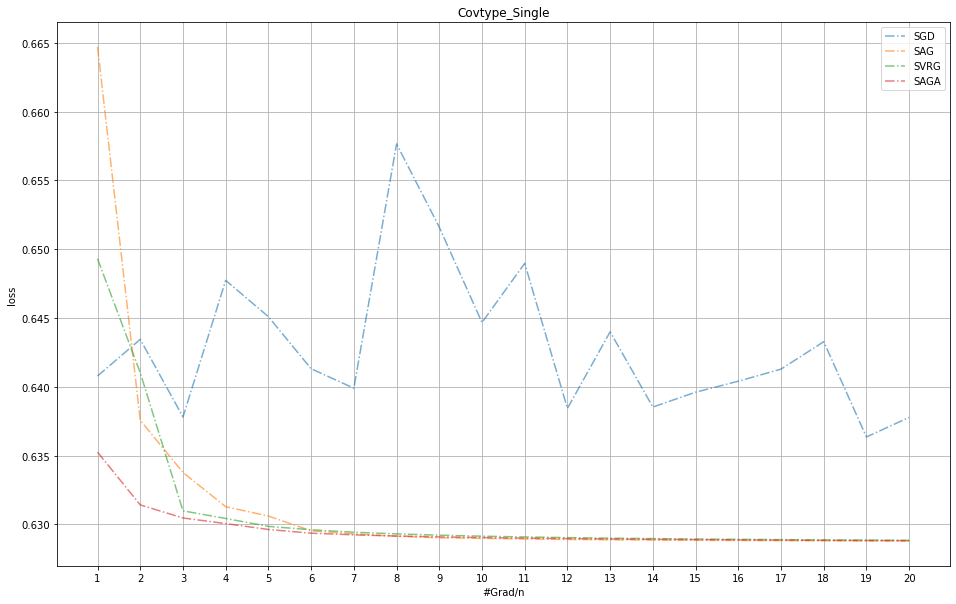

In [159]:
record_graph([record_SGD_single, record_SAG_single, record_SVRG_single, record_SAGA_single],'loss_#Grad/n')
plt.title("Covtype_Single")
plt.savefig("plot/covtype_single_loss.jpg")

### Minibatch Version (Test Acc)

In [160]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.27 seconds, Loss: 0.8055, Test Accuracy: 0.6904
# Grad/N 2: 2.31 seconds, Loss: 0.7462, Test Accuracy: 0.6985
# Grad/N 3: 3.34 seconds, Loss: 0.7205, Test Accuracy: 0.7049
# Grad/N 4: 4.37 seconds, Loss: 0.7051, Test Accuracy: 0.7106
# Grad/N 5: 5.39 seconds, Loss: 0.6949, Test Accuracy: 0.7126
# Grad/N 6: 6.41 seconds, Loss: 0.6873, Test Accuracy: 0.7143
# Grad/N 7: 7.45 seconds, Loss: 0.6815, Test Accuracy: 0.7152
# Grad/N 8: 8.48 seconds, Loss: 0.6769, Test Accuracy: 0.7171
# Grad/N 9: 9.51 seconds, Loss: 0.6730, Test Accuracy: 0.7164
# Grad/N 10: 10.53 seconds, Loss: 0.6701, Test Accuracy: 0.7166
# Grad/N 11: 11.57 seconds, Loss: 0.6672, Test Accuracy: 0.7181
# Grad/N 12: 12.61 seconds, Loss: 0.6648, Test Accuracy: 0.7179
# Grad/N 13: 13.65 seconds, Loss: 0.6628, Test Accuracy: 0.7184
# Grad/N 14: 14.68 seconds, Loss: 0.6609, Test Accuracy: 0.7185
# Grad/N 15: 15.70 seconds, Loss: 0.6594, Test Accuracy: 0.7196
# Grad/N 16: 16.72 seconds, Loss: 0.6579, Test Accuracy: 0

In [161]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.15 seconds, Loss: 0.7917, Test Accuracy: 0.6860
# Grad/N 2: 2.31 seconds, Loss: 0.7316, Test Accuracy: 0.7034
# Grad/N 3: 3.46 seconds, Loss: 0.7076, Test Accuracy: 0.7078
# Grad/N 4: 4.60 seconds, Loss: 0.6938, Test Accuracy: 0.7113
# Grad/N 5: 5.74 seconds, Loss: 0.6849, Test Accuracy: 0.7149
# Grad/N 6: 6.89 seconds, Loss: 0.6786, Test Accuracy: 0.7158
# Grad/N 7: 8.04 seconds, Loss: 0.6738, Test Accuracy: 0.7162
# Grad/N 8: 9.19 seconds, Loss: 0.6700, Test Accuracy: 0.7169
# Grad/N 9: 10.35 seconds, Loss: 0.6670, Test Accuracy: 0.7177
# Grad/N 10: 11.49 seconds, Loss: 0.6644, Test Accuracy: 0.7183
# Grad/N 11: 12.65 seconds, Loss: 0.6623, Test Accuracy: 0.7186
# Grad/N 12: 13.80 seconds, Loss: 0.6604, Test Accuracy: 0.7188
# Grad/N 13: 14.95 seconds, Loss: 0.6587, Test Accuracy: 0.7194
# Grad/N 14: 16.09 seconds, Loss: 0.6572, Test Accuracy: 0.7196
# Grad/N 15: 17.25 seconds, Loss: 0.6559, Test Accuracy: 0.7197
# Grad/N 16: 18.41 seconds, Loss: 0.6547, Test Accuracy: 

In [162]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=10, mb_size=100)

# Grad/N 1: 1.48 seconds, Loss: 0.8055, Test Accuracy: 0.6897
# Grad/N 2: 2.70 seconds, Loss: 0.7464, Test Accuracy: 0.6992
# Grad/N 3: 4.01 seconds, Loss: 0.7203, Test Accuracy: 0.7052
# Grad/N 4: 5.22 seconds, Loss: 0.7050, Test Accuracy: 0.7098
# Grad/N 5: 6.53 seconds, Loss: 0.6947, Test Accuracy: 0.7121
# Grad/N 6: 7.75 seconds, Loss: 0.6872, Test Accuracy: 0.7139
# Grad/N 7: 9.06 seconds, Loss: 0.6814, Test Accuracy: 0.7151
# Grad/N 8: 10.27 seconds, Loss: 0.6768, Test Accuracy: 0.7159
# Grad/N 9: 11.60 seconds, Loss: 0.6730, Test Accuracy: 0.7166
# Grad/N 10: 12.81 seconds, Loss: 0.6698, Test Accuracy: 0.7172
# Grad/N 11: 14.12 seconds, Loss: 0.6671, Test Accuracy: 0.7178
# Grad/N 12: 15.35 seconds, Loss: 0.6647, Test Accuracy: 0.7182
# Grad/N 13: 16.66 seconds, Loss: 0.6627, Test Accuracy: 0.7187
# Grad/N 14: 17.87 seconds, Loss: 0.6609, Test Accuracy: 0.7191
# Grad/N 15: 19.18 seconds, Loss: 0.6592, Test Accuracy: 0.7194
# Grad/N 16: 20.40 seconds, Loss: 0.6578, Test Accuracy:

In [163]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA, record_SAGA = train_SAGA(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.19 seconds, Loss: 0.7467, Test Accuracy: 0.6978
# Grad/N 2: 2.38 seconds, Loss: 0.7155, Test Accuracy: 0.7063
# Grad/N 3: 3.57 seconds, Loss: 0.7012, Test Accuracy: 0.7103
# Grad/N 4: 4.77 seconds, Loss: 0.6918, Test Accuracy: 0.7125
# Grad/N 5: 5.96 seconds, Loss: 0.6849, Test Accuracy: 0.7141
# Grad/N 6: 7.15 seconds, Loss: 0.6796, Test Accuracy: 0.7153
# Grad/N 7: 8.35 seconds, Loss: 0.6753, Test Accuracy: 0.7162
# Grad/N 8: 9.54 seconds, Loss: 0.6718, Test Accuracy: 0.7168
# Grad/N 9: 10.73 seconds, Loss: 0.6687, Test Accuracy: 0.7174
# Grad/N 10: 11.92 seconds, Loss: 0.6662, Test Accuracy: 0.7179
# Grad/N 11: 13.11 seconds, Loss: 0.6639, Test Accuracy: 0.7183
# Grad/N 12: 14.29 seconds, Loss: 0.6619, Test Accuracy: 0.7189
# Grad/N 13: 15.49 seconds, Loss: 0.6602, Test Accuracy: 0.7192
# Grad/N 14: 16.69 seconds, Loss: 0.6586, Test Accuracy: 0.7194
# Grad/N 15: 17.87 seconds, Loss: 0.6572, Test Accuracy: 0.7196
# Grad/N 16: 19.06 seconds, Loss: 0.6559, Test Accuracy: 

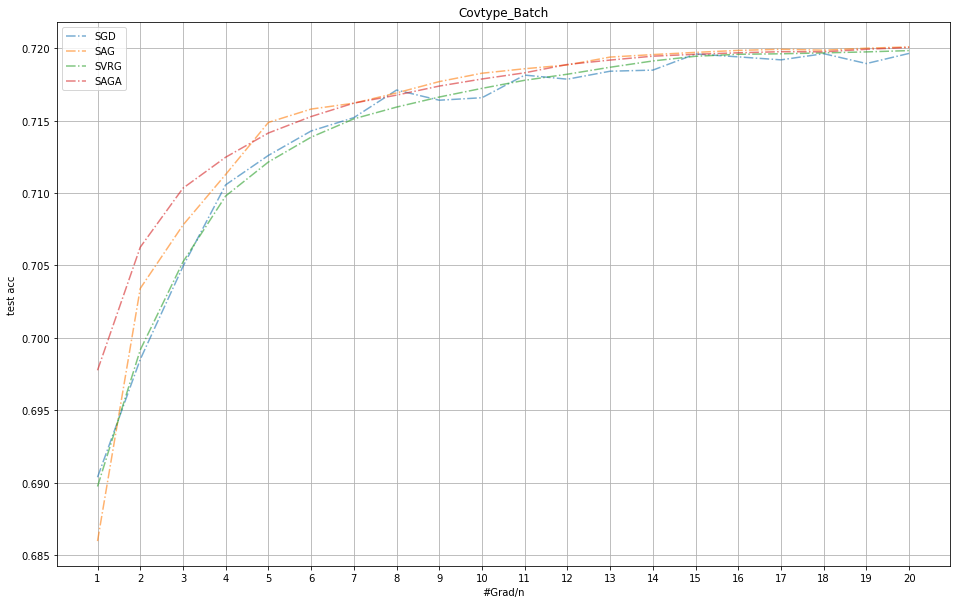

In [164]:
record_graph([record_SGD, record_SAG, record_SVRG, record_SAGA],'test_acc_#Grad/n')
plt.title("Covtype_Batch")
plt.savefig("plot/covtype_batch_acc.jpg")

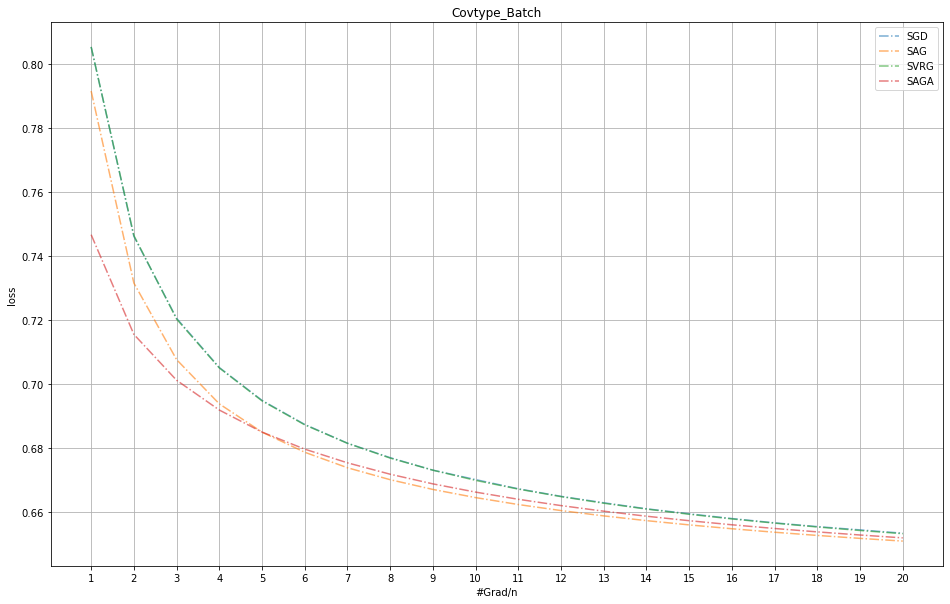

In [165]:
record_graph([record_SGD, record_SAG, record_SVRG, record_SAGA],'loss_#Grad/n')
plt.title("Covtype_Batch")
plt.savefig("plot/covtype_batch_loss.jpg")

## Experiment with IJCNN

In [166]:
ijcnn_train_data.shape

(49990, 22)

In [167]:
train_data, test_data, train_label, test_label = ijcnn_train_data, ijcnn_test_data, ijcnn_train_label, ijcnn_test_label

In [168]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1]), array([45137,  4853]))
(array([0, 1]), array([82989,  8712]))
(49990, 22)
(91701, 22)


In [169]:
n_features = 22
n_classes = 2
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [170]:
beta_init.shape

(2, 22)

#### Optimal Results from Commercial Package

In [171]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(penalty='none', solver='lbfgs', fit_intercept=False, max_iter=1000, tol=1e-20)
# model.fit(train_data, np.ravel(train_label))

In [172]:
# beta_best = np.zeros(beta_init.shape)
# beta_best[0], beta_best[1] = -1*model.coef_, model.coef_
# loss_best = loss_LR(beta_best, train_data, train_label)
# print(loss_best)

### Single Version (Train Loss)

In [173]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.27 seconds, Loss: 0.2090
# Grad/N 2: 2.46 seconds, Loss: 0.1940
# Grad/N 3: 3.66 seconds, Loss: 0.1892
# Grad/N 4: 4.85 seconds, Loss: 0.1867
# Grad/N 5: 6.04 seconds, Loss: 0.1854
# Grad/N 6: 7.23 seconds, Loss: 0.1850
# Grad/N 7: 8.42 seconds, Loss: 0.1844
# Grad/N 8: 9.61 seconds, Loss: 0.1844
# Grad/N 9: 10.80 seconds, Loss: 0.1839
# Grad/N 10: 11.99 seconds, Loss: 0.1838
# Grad/N 11: 13.19 seconds, Loss: 0.1838
# Grad/N 12: 14.37 seconds, Loss: 0.1837
# Grad/N 13: 15.56 seconds, Loss: 0.1834
# Grad/N 14: 16.74 seconds, Loss: 0.1834
# Grad/N 15: 17.92 seconds, Loss: 0.1834
# Grad/N 16: 19.10 seconds, Loss: 0.1838
# Grad/N 17: 20.29 seconds, Loss: 0.1834
# Grad/N 18: 21.48 seconds, Loss: 0.1835
# Grad/N 19: 22.69 seconds, Loss: 0.1838
# Grad/N 20: 23.88 seconds, Loss: 0.1834


In [174]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 2.99 seconds, Loss: 0.2022
# Grad/N 2: 5.98 seconds, Loss: 0.1904
# Grad/N 3: 8.96 seconds, Loss: 0.1866
# Grad/N 4: 11.95 seconds, Loss: 0.1846
# Grad/N 5: 14.92 seconds, Loss: 0.1836
# Grad/N 6: 17.91 seconds, Loss: 0.1833
# Grad/N 7: 20.89 seconds, Loss: 0.1832
# Grad/N 8: 23.87 seconds, Loss: 0.1832
# Grad/N 9: 26.91 seconds, Loss: 0.1832
# Grad/N 10: 29.91 seconds, Loss: 0.1831
# Grad/N 11: 32.89 seconds, Loss: 0.1831
# Grad/N 12: 35.87 seconds, Loss: 0.1831
# Grad/N 13: 38.86 seconds, Loss: 0.1831
# Grad/N 14: 41.85 seconds, Loss: 0.1831
# Grad/N 15: 44.95 seconds, Loss: 0.1831
# Grad/N 16: 47.98 seconds, Loss: 0.1831
# Grad/N 17: 51.00 seconds, Loss: 0.1831
# Grad/N 18: 54.03 seconds, Loss: 0.1831
# Grad/N 19: 57.04 seconds, Loss: 0.1831
# Grad/N 20: 60.06 seconds, Loss: 0.1831


In [175]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=10, verbose = 1)

# Grad/N 1: 2.32 seconds, Loss: 0.2089
# Grad/N 2: 4.52 seconds, Loss: 0.1943
# Grad/N 3: 6.69 seconds, Loss: 0.1884
# Grad/N 4: 8.86 seconds, Loss: 0.1863
# Grad/N 5: 11.02 seconds, Loss: 0.1851
# Grad/N 6: 13.17 seconds, Loss: 0.1844
# Grad/N 7: 15.33 seconds, Loss: 0.1840
# Grad/N 8: 17.50 seconds, Loss: 0.1837
# Grad/N 9: 19.70 seconds, Loss: 0.1835
# Grad/N 10: 21.88 seconds, Loss: 0.1834
# Grad/N 11: 24.05 seconds, Loss: 0.1833
# Grad/N 12: 26.21 seconds, Loss: 0.1832
# Grad/N 13: 28.38 seconds, Loss: 0.1832
# Grad/N 14: 30.55 seconds, Loss: 0.1832
# Grad/N 15: 32.73 seconds, Loss: 0.1832
# Grad/N 16: 34.91 seconds, Loss: 0.1831
# Grad/N 17: 37.08 seconds, Loss: 0.1831
# Grad/N 18: 39.26 seconds, Loss: 0.1831
# Grad/N 19: 41.43 seconds, Loss: 0.1831
# Grad/N 20: 43.60 seconds, Loss: 0.1831


In [176]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA_single, record_SAGA_single = train_SAGA_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 3.52 seconds, Loss: 0.1937
# Grad/N 2: 7.00 seconds, Loss: 0.1878
# Grad/N 3: 10.47 seconds, Loss: 0.1858
# Grad/N 4: 13.96 seconds, Loss: 0.1848
# Grad/N 5: 17.44 seconds, Loss: 0.1842
# Grad/N 6: 20.91 seconds, Loss: 0.1838
# Grad/N 7: 24.38 seconds, Loss: 0.1836
# Grad/N 8: 27.87 seconds, Loss: 0.1834
# Grad/N 9: 31.34 seconds, Loss: 0.1833
# Grad/N 10: 34.81 seconds, Loss: 0.1833
# Grad/N 11: 38.29 seconds, Loss: 0.1832
# Grad/N 12: 41.77 seconds, Loss: 0.1832
# Grad/N 13: 45.24 seconds, Loss: 0.1832
# Grad/N 14: 48.72 seconds, Loss: 0.1832
# Grad/N 15: 52.20 seconds, Loss: 0.1831
# Grad/N 16: 55.69 seconds, Loss: 0.1831
# Grad/N 17: 59.17 seconds, Loss: 0.1831
# Grad/N 18: 62.65 seconds, Loss: 0.1831
# Grad/N 19: 66.12 seconds, Loss: 0.1831
# Grad/N 20: 69.61 seconds, Loss: 0.1831


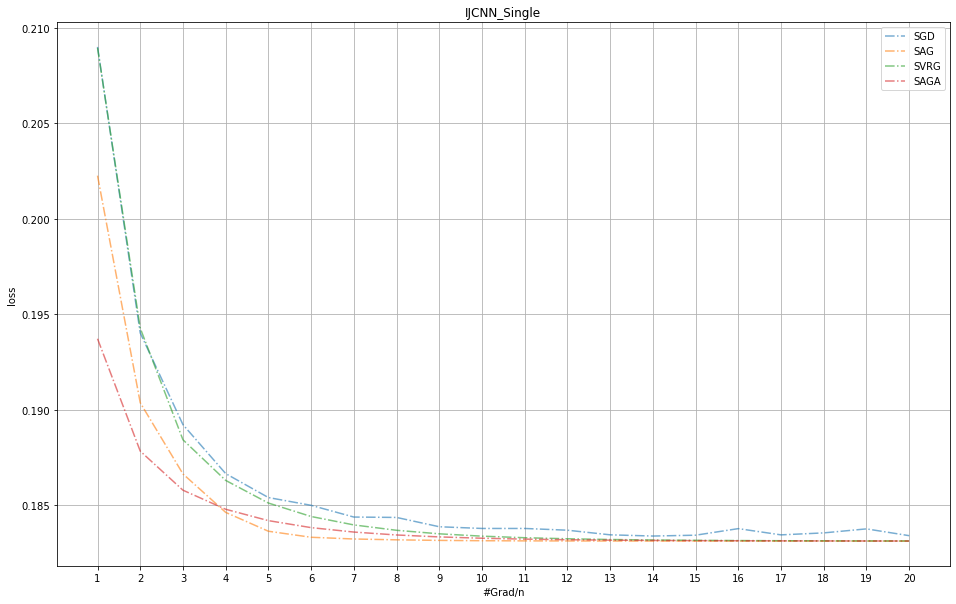

In [177]:
record_graph([record_SGD_single, record_SAG_single, record_SVRG_single, record_SAGA_single],'loss_#Grad/n')
plt.title("IJCNN_Single")
plt.savefig("plot/ijcnn_single_loss.jpg")

### Minibatch Version (Test Acc)

In [178]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.62 seconds, Loss: 0.4887, Test Accuracy: 0.8950
# Grad/N 2: 1.07 seconds, Loss: 0.4126, Test Accuracy: 0.9050
# Grad/N 3: 1.53 seconds, Loss: 0.3752, Test Accuracy: 0.9051
# Grad/N 4: 1.98 seconds, Loss: 0.3549, Test Accuracy: 0.9051
# Grad/N 5: 2.43 seconds, Loss: 0.3417, Test Accuracy: 0.9051
# Grad/N 6: 2.89 seconds, Loss: 0.3328, Test Accuracy: 0.9051
# Grad/N 7: 3.34 seconds, Loss: 0.3258, Test Accuracy: 0.9051
# Grad/N 8: 3.79 seconds, Loss: 0.3204, Test Accuracy: 0.9051
# Grad/N 9: 4.24 seconds, Loss: 0.3157, Test Accuracy: 0.9051
# Grad/N 10: 4.69 seconds, Loss: 0.3117, Test Accuracy: 0.9051
# Grad/N 11: 5.15 seconds, Loss: 0.3080, Test Accuracy: 0.9051
# Grad/N 12: 5.60 seconds, Loss: 0.3046, Test Accuracy: 0.9051
# Grad/N 13: 6.05 seconds, Loss: 0.3014, Test Accuracy: 0.9051
# Grad/N 14: 6.50 seconds, Loss: 0.2984, Test Accuracy: 0.9051
# Grad/N 15: 6.96 seconds, Loss: 0.2956, Test Accuracy: 0.9051
# Grad/N 16: 7.41 seconds, Loss: 0.2928, Test Accuracy: 0.9051
#

In [179]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.47 seconds, Loss: 0.4751, Test Accuracy: 0.9003
# Grad/N 2: 0.93 seconds, Loss: 0.3907, Test Accuracy: 0.9051
# Grad/N 3: 1.40 seconds, Loss: 0.3559, Test Accuracy: 0.9051
# Grad/N 4: 1.86 seconds, Loss: 0.3396, Test Accuracy: 0.9051
# Grad/N 5: 2.32 seconds, Loss: 0.3306, Test Accuracy: 0.9051
# Grad/N 6: 2.79 seconds, Loss: 0.3246, Test Accuracy: 0.9051
# Grad/N 7: 3.26 seconds, Loss: 0.3199, Test Accuracy: 0.9051
# Grad/N 8: 3.72 seconds, Loss: 0.3159, Test Accuracy: 0.9051
# Grad/N 9: 4.19 seconds, Loss: 0.3123, Test Accuracy: 0.9051
# Grad/N 10: 4.65 seconds, Loss: 0.3090, Test Accuracy: 0.9051
# Grad/N 11: 5.12 seconds, Loss: 0.3058, Test Accuracy: 0.9051
# Grad/N 12: 5.59 seconds, Loss: 0.3028, Test Accuracy: 0.9051
# Grad/N 13: 6.06 seconds, Loss: 0.2998, Test Accuracy: 0.9051
# Grad/N 14: 6.53 seconds, Loss: 0.2970, Test Accuracy: 0.9051
# Grad/N 15: 6.99 seconds, Loss: 0.2942, Test Accuracy: 0.9051
# Grad/N 16: 7.46 seconds, Loss: 0.2915, Test Accuracy: 0.9051
#

In [180]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=10, mb_size=100)

# Grad/N 1: 0.56 seconds, Loss: 0.4898, Test Accuracy: 0.8943
# Grad/N 2: 1.03 seconds, Loss: 0.4129, Test Accuracy: 0.9050
# Grad/N 3: 1.50 seconds, Loss: 0.3757, Test Accuracy: 0.9051
# Grad/N 4: 1.97 seconds, Loss: 0.3547, Test Accuracy: 0.9051
# Grad/N 5: 2.43 seconds, Loss: 0.3415, Test Accuracy: 0.9051
# Grad/N 6: 2.90 seconds, Loss: 0.3324, Test Accuracy: 0.9051
# Grad/N 7: 3.37 seconds, Loss: 0.3255, Test Accuracy: 0.9051
# Grad/N 8: 3.83 seconds, Loss: 0.3200, Test Accuracy: 0.9051
# Grad/N 9: 4.30 seconds, Loss: 0.3154, Test Accuracy: 0.9051
# Grad/N 10: 4.77 seconds, Loss: 0.3113, Test Accuracy: 0.9051
# Grad/N 11: 5.23 seconds, Loss: 0.3077, Test Accuracy: 0.9051
# Grad/N 12: 5.70 seconds, Loss: 0.3043, Test Accuracy: 0.9051
# Grad/N 13: 6.17 seconds, Loss: 0.3011, Test Accuracy: 0.9051
# Grad/N 14: 6.63 seconds, Loss: 0.2981, Test Accuracy: 0.9051
# Grad/N 15: 7.10 seconds, Loss: 0.2952, Test Accuracy: 0.9051
# Grad/N 16: 7.57 seconds, Loss: 0.2925, Test Accuracy: 0.9051
#

In [181]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA, record_SAGA = train_SAGA(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.47 seconds, Loss: 0.4248, Test Accuracy: 0.9049
# Grad/N 2: 0.94 seconds, Loss: 0.3732, Test Accuracy: 0.9051
# Grad/N 3: 1.41 seconds, Loss: 0.3522, Test Accuracy: 0.9051
# Grad/N 4: 1.88 seconds, Loss: 0.3396, Test Accuracy: 0.9051
# Grad/N 5: 2.35 seconds, Loss: 0.3311, Test Accuracy: 0.9051
# Grad/N 6: 2.82 seconds, Loss: 0.3248, Test Accuracy: 0.9051
# Grad/N 7: 3.29 seconds, Loss: 0.3195, Test Accuracy: 0.9051
# Grad/N 8: 3.76 seconds, Loss: 0.3150, Test Accuracy: 0.9051
# Grad/N 9: 4.23 seconds, Loss: 0.3111, Test Accuracy: 0.9051
# Grad/N 10: 4.70 seconds, Loss: 0.3075, Test Accuracy: 0.9051
# Grad/N 11: 5.17 seconds, Loss: 0.3041, Test Accuracy: 0.9051
# Grad/N 12: 5.64 seconds, Loss: 0.3010, Test Accuracy: 0.9051
# Grad/N 13: 6.11 seconds, Loss: 0.2980, Test Accuracy: 0.9051
# Grad/N 14: 6.58 seconds, Loss: 0.2952, Test Accuracy: 0.9051
# Grad/N 15: 7.05 seconds, Loss: 0.2924, Test Accuracy: 0.9051
# Grad/N 16: 7.53 seconds, Loss: 0.2898, Test Accuracy: 0.9051
#

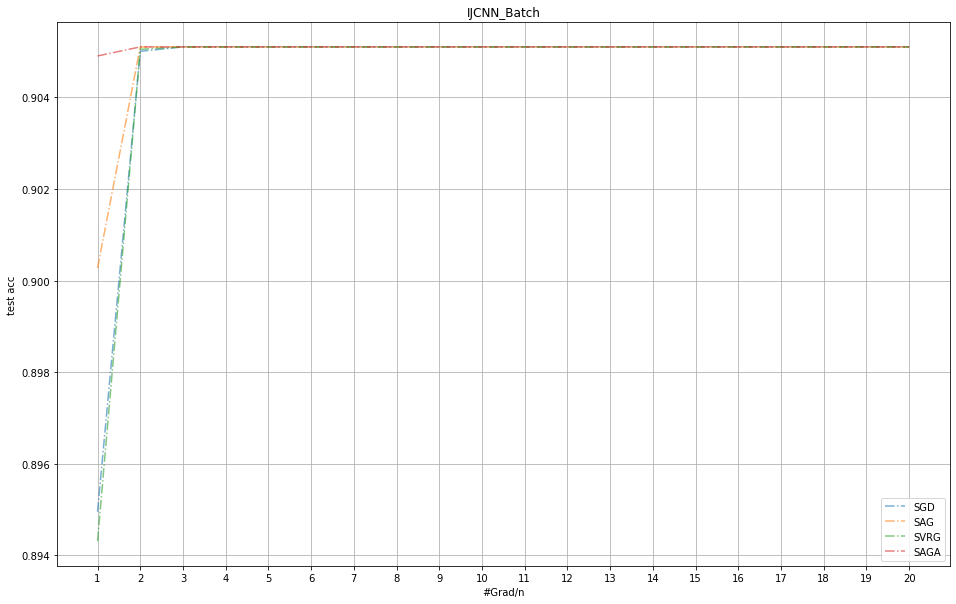

In [182]:
record_graph([record_SGD, record_SAG, record_SVRG, record_SAGA],'test_acc_#Grad/n')
plt.title("IJCNN_Batch")
plt.savefig("plot/ijcnn_batch_acc.jpg")

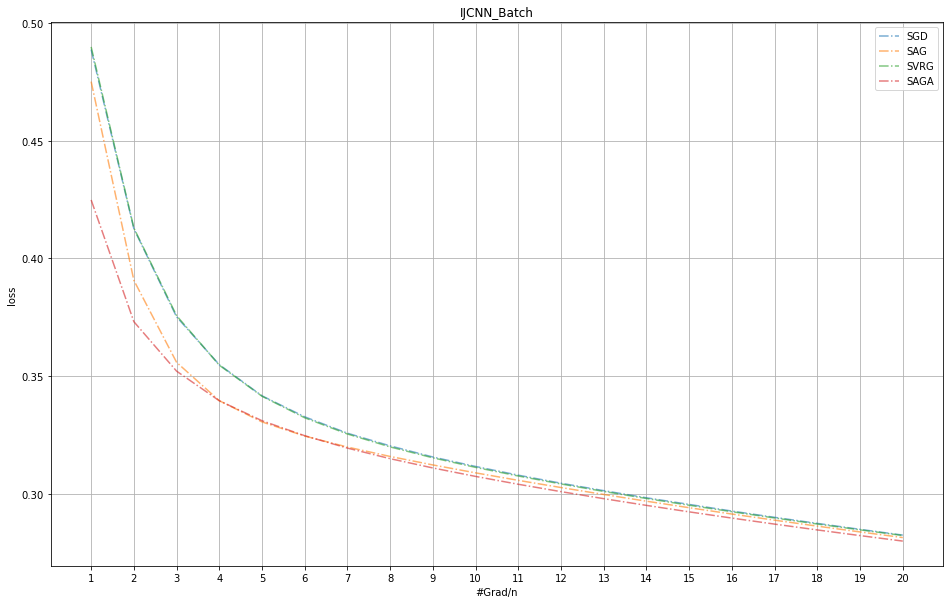

In [183]:
record_graph([record_SGD, record_SAG, record_SVRG, record_SAGA],'loss_#Grad/n')
plt.title("IJCNN_Batch")
plt.savefig("plot/ijcnn_batch_loss.jpg")

## Experiment with MNIST

In [184]:
mnist_train_images.shape

(60000, 28, 28)

In [185]:
train_data, test_data, train_label, test_label = mnist_train_images.reshape(-1,28*28), mnist_test_images.reshape(-1,28*28), mnist_train_labels, mnist_test_labels

In [186]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(60000, 784)
(10000, 784)


In [187]:
n_features = 28*28
n_classes = 10
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [188]:
beta_init.shape

(10, 784)

#### Optimal Results from Commercial Package

In [189]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(penalty='none', solver='lbfgs', fit_intercept=False, max_iter=1000, tol=1e-20)
# model.fit(train_data, np.ravel(train_label))

In [190]:
# beta_best = model.coef_
# # beta_best[0], beta_best[1] = -1*model.coef_, model.coef_
# loss_best = loss_LR(beta_best, train_data, train_label)
# print(loss_best)

### Single Version (Grad Var and Train Loss)

In [191]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 2.25 seconds, Loss: 0.3067
# Grad/N 2: 4.24 seconds, Loss: 0.2920
# Grad/N 3: 6.22 seconds, Loss: 0.2845
# Grad/N 4: 8.20 seconds, Loss: 0.2770
# Grad/N 5: 10.19 seconds, Loss: 0.3019
# Grad/N 6: 12.18 seconds, Loss: 0.2756
# Grad/N 7: 14.17 seconds, Loss: 0.2783
# Grad/N 8: 16.15 seconds, Loss: 0.2702
# Grad/N 9: 18.14 seconds, Loss: 0.2807
# Grad/N 10: 20.12 seconds, Loss: 0.2798
# Grad/N 11: 22.11 seconds, Loss: 0.2775
# Grad/N 12: 24.11 seconds, Loss: 0.2818
# Grad/N 13: 26.09 seconds, Loss: 0.2633
# Grad/N 14: 28.08 seconds, Loss: 0.2665
# Grad/N 15: 30.07 seconds, Loss: 0.2690
# Grad/N 16: 32.06 seconds, Loss: 0.2615
# Grad/N 17: 34.04 seconds, Loss: 0.2584
# Grad/N 18: 36.03 seconds, Loss: 0.2641
# Grad/N 19: 38.02 seconds, Loss: 0.2547
# Grad/N 20: 40.00 seconds, Loss: 0.2580


In [192]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 6.76 seconds, Loss: 0.3749
# Grad/N 2: 13.07 seconds, Loss: 0.3052
# Grad/N 3: 18.80 seconds, Loss: 0.2810
# Grad/N 4: 24.09 seconds, Loss: 0.2673
# Grad/N 5: 29.24 seconds, Loss: 0.2594
# Grad/N 6: 34.31 seconds, Loss: 0.2554
# Grad/N 7: 39.31 seconds, Loss: 0.2520
# Grad/N 8: 44.27 seconds, Loss: 0.2497
# Grad/N 9: 49.48 seconds, Loss: 0.2476
# Grad/N 10: 54.73 seconds, Loss: 0.2461
# Grad/N 11: 59.90 seconds, Loss: 0.2449
# Grad/N 12: 65.00 seconds, Loss: 0.2439
# Grad/N 13: 70.12 seconds, Loss: 0.2430
# Grad/N 14: 75.16 seconds, Loss: 0.2422
# Grad/N 15: 80.13 seconds, Loss: 0.2414
# Grad/N 16: 85.10 seconds, Loss: 0.2407
# Grad/N 17: 90.17 seconds, Loss: 0.2400
# Grad/N 18: 95.33 seconds, Loss: 0.2394
# Grad/N 19: 100.49 seconds, Loss: 0.2389
# Grad/N 20: 105.64 seconds, Loss: 0.2383


In [193]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=10, verbose = 1)

# Grad/N 1: 3.93 seconds, Loss: 0.4717
# Grad/N 2: 7.72 seconds, Loss: 0.4747
# Grad/N 3: 11.46 seconds, Loss: 0.2877
# Grad/N 4: 15.19 seconds, Loss: 0.2757
# Grad/N 5: 18.95 seconds, Loss: 0.2585
# Grad/N 6: 22.66 seconds, Loss: 0.2553
# Grad/N 7: 26.43 seconds, Loss: 0.2519
# Grad/N 8: 30.14 seconds, Loss: 0.2501
# Grad/N 9: 33.89 seconds, Loss: 0.2483
# Grad/N 10: 37.61 seconds, Loss: 0.2469
# Grad/N 11: 41.37 seconds, Loss: 0.2457
# Grad/N 12: 45.07 seconds, Loss: 0.2446
# Grad/N 13: 48.82 seconds, Loss: 0.2437
# Grad/N 14: 52.52 seconds, Loss: 0.2428
# Grad/N 15: 56.28 seconds, Loss: 0.2420
# Grad/N 16: 59.99 seconds, Loss: 0.2412
# Grad/N 17: 63.74 seconds, Loss: 0.2406
# Grad/N 18: 67.44 seconds, Loss: 0.2399
# Grad/N 19: 71.19 seconds, Loss: 0.2393
# Grad/N 20: 74.88 seconds, Loss: 0.2388


In [194]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA_single, record_SAGA_single = train_SAGA_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 6.92 seconds, Loss: 0.2873
# Grad/N 2: 13.33 seconds, Loss: 0.2705
# Grad/N 3: 19.86 seconds, Loss: 0.2622
# Grad/N 4: 26.34 seconds, Loss: 0.2575
# Grad/N 5: 32.45 seconds, Loss: 0.2541
# Grad/N 6: 38.34 seconds, Loss: 0.2517
# Grad/N 7: 44.18 seconds, Loss: 0.2498
# Grad/N 8: 49.99 seconds, Loss: 0.2483
# Grad/N 9: 55.79 seconds, Loss: 0.2469
# Grad/N 10: 61.55 seconds, Loss: 0.2457
# Grad/N 11: 67.42 seconds, Loss: 0.2446
# Grad/N 12: 73.87 seconds, Loss: 0.2437
# Grad/N 13: 80.27 seconds, Loss: 0.2428
# Grad/N 14: 86.39 seconds, Loss: 0.2420
# Grad/N 15: 92.45 seconds, Loss: 0.2412
# Grad/N 16: 98.34 seconds, Loss: 0.2406
# Grad/N 17: 104.21 seconds, Loss: 0.2399
# Grad/N 18: 110.13 seconds, Loss: 0.2393
# Grad/N 19: 116.03 seconds, Loss: 0.2388
# Grad/N 20: 121.93 seconds, Loss: 0.2382


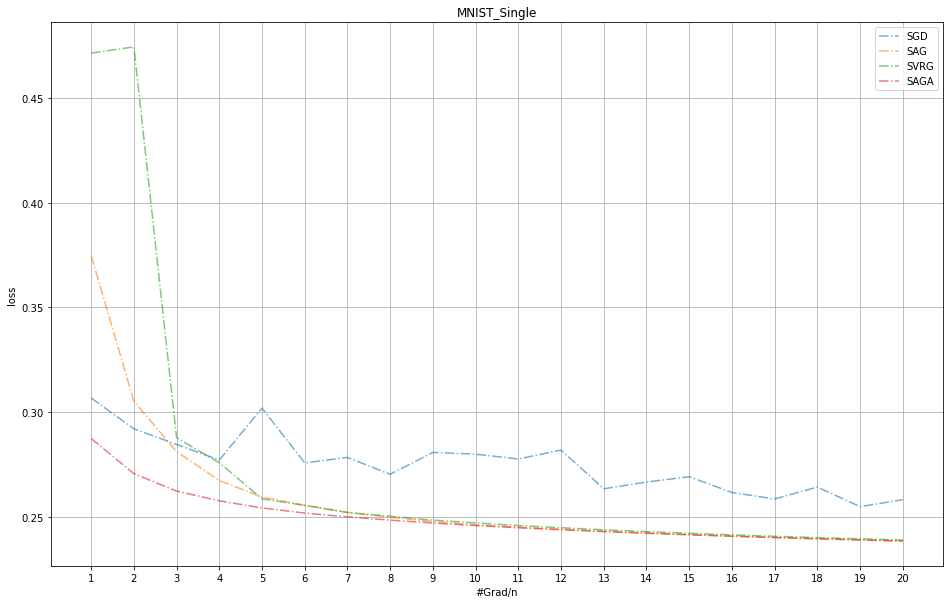

In [195]:
record_graph([record_SGD_single, record_SAG_single, record_SVRG_single, record_SAGA_single],'loss_#Grad/n')
plt.title("MNIST_Single")
plt.savefig("plot/mnist_single_loss.jpg")

### Minibatch Version (Test Acc)

In [196]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.48 seconds, Loss: 0.7504, Test Accuracy: 0.8503
# Grad/N 2: 0.74 seconds, Loss: 0.5784, Test Accuracy: 0.8686
# Grad/N 3: 0.99 seconds, Loss: 0.5098, Test Accuracy: 0.8796
# Grad/N 4: 1.25 seconds, Loss: 0.4706, Test Accuracy: 0.8866
# Grad/N 5: 1.51 seconds, Loss: 0.4450, Test Accuracy: 0.8907
# Grad/N 6: 1.77 seconds, Loss: 0.4268, Test Accuracy: 0.8932
# Grad/N 7: 2.05 seconds, Loss: 0.4122, Test Accuracy: 0.8961
# Grad/N 8: 2.31 seconds, Loss: 0.4011, Test Accuracy: 0.8977
# Grad/N 9: 2.58 seconds, Loss: 0.3918, Test Accuracy: 0.9006
# Grad/N 10: 2.84 seconds, Loss: 0.3842, Test Accuracy: 0.9023
# Grad/N 11: 3.11 seconds, Loss: 0.3776, Test Accuracy: 0.9046
# Grad/N 12: 3.36 seconds, Loss: 0.3716, Test Accuracy: 0.9045
# Grad/N 13: 3.61 seconds, Loss: 0.3665, Test Accuracy: 0.9055
# Grad/N 14: 3.87 seconds, Loss: 0.3622, Test Accuracy: 0.9073
# Grad/N 15: 4.14 seconds, Loss: 0.3582, Test Accuracy: 0.9065
# Grad/N 16: 4.40 seconds, Loss: 0.3543, Test Accuracy: 0.9078
#

In [197]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.29 seconds, Loss: 0.6343, Test Accuracy: 0.8423
# Grad/N 2: 0.57 seconds, Loss: 0.5002, Test Accuracy: 0.8686
# Grad/N 3: 0.86 seconds, Loss: 0.4533, Test Accuracy: 0.8800
# Grad/N 4: 1.15 seconds, Loss: 0.4285, Test Accuracy: 0.8882
# Grad/N 5: 1.44 seconds, Loss: 0.4122, Test Accuracy: 0.8918
# Grad/N 6: 1.72 seconds, Loss: 0.4002, Test Accuracy: 0.8950
# Grad/N 7: 2.01 seconds, Loss: 0.3908, Test Accuracy: 0.8973
# Grad/N 8: 2.33 seconds, Loss: 0.3831, Test Accuracy: 0.8997
# Grad/N 9: 2.62 seconds, Loss: 0.3766, Test Accuracy: 0.9022
# Grad/N 10: 2.91 seconds, Loss: 0.3709, Test Accuracy: 0.9036
# Grad/N 11: 3.19 seconds, Loss: 0.3660, Test Accuracy: 0.9052
# Grad/N 12: 3.48 seconds, Loss: 0.3615, Test Accuracy: 0.9065
# Grad/N 13: 3.77 seconds, Loss: 0.3576, Test Accuracy: 0.9077
# Grad/N 14: 4.05 seconds, Loss: 0.3540, Test Accuracy: 0.9083
# Grad/N 15: 4.34 seconds, Loss: 0.3507, Test Accuracy: 0.9086
# Grad/N 16: 4.62 seconds, Loss: 0.3477, Test Accuracy: 0.9098
#

In [198]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=10, mb_size=100)

# Grad/N 1: 0.54 seconds, Loss: 0.7482, Test Accuracy: 0.8495
# Grad/N 2: 0.94 seconds, Loss: 0.5801, Test Accuracy: 0.8705
# Grad/N 3: 1.38 seconds, Loss: 0.5093, Test Accuracy: 0.8808
# Grad/N 4: 1.78 seconds, Loss: 0.4702, Test Accuracy: 0.8866
# Grad/N 5: 2.22 seconds, Loss: 0.4445, Test Accuracy: 0.8904
# Grad/N 6: 2.62 seconds, Loss: 0.4260, Test Accuracy: 0.8932
# Grad/N 7: 3.06 seconds, Loss: 0.4118, Test Accuracy: 0.8953
# Grad/N 8: 3.46 seconds, Loss: 0.4006, Test Accuracy: 0.8980
# Grad/N 9: 3.91 seconds, Loss: 0.3914, Test Accuracy: 0.9003
# Grad/N 10: 4.31 seconds, Loss: 0.3837, Test Accuracy: 0.9033
# Grad/N 11: 4.75 seconds, Loss: 0.3770, Test Accuracy: 0.9042
# Grad/N 12: 5.15 seconds, Loss: 0.3713, Test Accuracy: 0.9054
# Grad/N 13: 5.59 seconds, Loss: 0.3662, Test Accuracy: 0.9060
# Grad/N 14: 5.99 seconds, Loss: 0.3618, Test Accuracy: 0.9070
# Grad/N 15: 6.43 seconds, Loss: 0.3577, Test Accuracy: 0.9079
# Grad/N 16: 6.83 seconds, Loss: 0.3541, Test Accuracy: 0.9087
#

In [199]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA, record_SAGA = train_SAGA(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.30 seconds, Loss: 0.5801, Test Accuracy: 0.8653
# Grad/N 2: 0.60 seconds, Loss: 0.4931, Test Accuracy: 0.8814
# Grad/N 3: 0.90 seconds, Loss: 0.4584, Test Accuracy: 0.8875
# Grad/N 4: 1.20 seconds, Loss: 0.4361, Test Accuracy: 0.8911
# Grad/N 5: 1.49 seconds, Loss: 0.4205, Test Accuracy: 0.8944
# Grad/N 6: 1.79 seconds, Loss: 0.4076, Test Accuracy: 0.8961
# Grad/N 7: 2.09 seconds, Loss: 0.3974, Test Accuracy: 0.8982
# Grad/N 8: 2.39 seconds, Loss: 0.3888, Test Accuracy: 0.9008
# Grad/N 9: 2.69 seconds, Loss: 0.3816, Test Accuracy: 0.9027
# Grad/N 10: 2.99 seconds, Loss: 0.3753, Test Accuracy: 0.9041
# Grad/N 11: 3.29 seconds, Loss: 0.3699, Test Accuracy: 0.9054
# Grad/N 12: 3.59 seconds, Loss: 0.3650, Test Accuracy: 0.9062
# Grad/N 13: 3.89 seconds, Loss: 0.3607, Test Accuracy: 0.9070
# Grad/N 14: 4.18 seconds, Loss: 0.3568, Test Accuracy: 0.9081
# Grad/N 15: 4.48 seconds, Loss: 0.3533, Test Accuracy: 0.9086
# Grad/N 16: 4.78 seconds, Loss: 0.3500, Test Accuracy: 0.9095
#

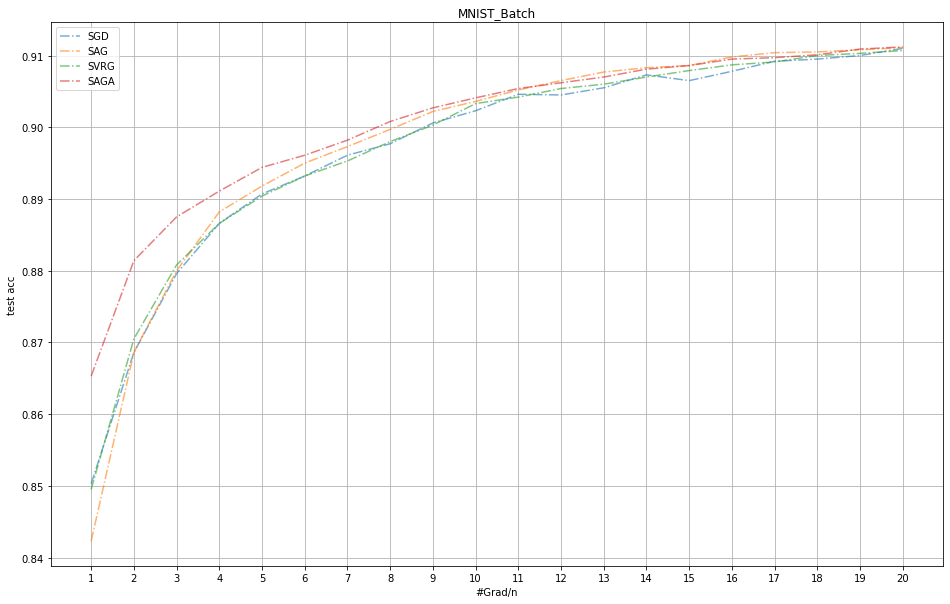

In [200]:
record_graph([record_SGD, record_SAG, record_SVRG, record_SAGA],'test_acc_#Grad/n')
plt.title("MNIST_Batch")
plt.savefig("plot/mnist_batch_acc.jpg")

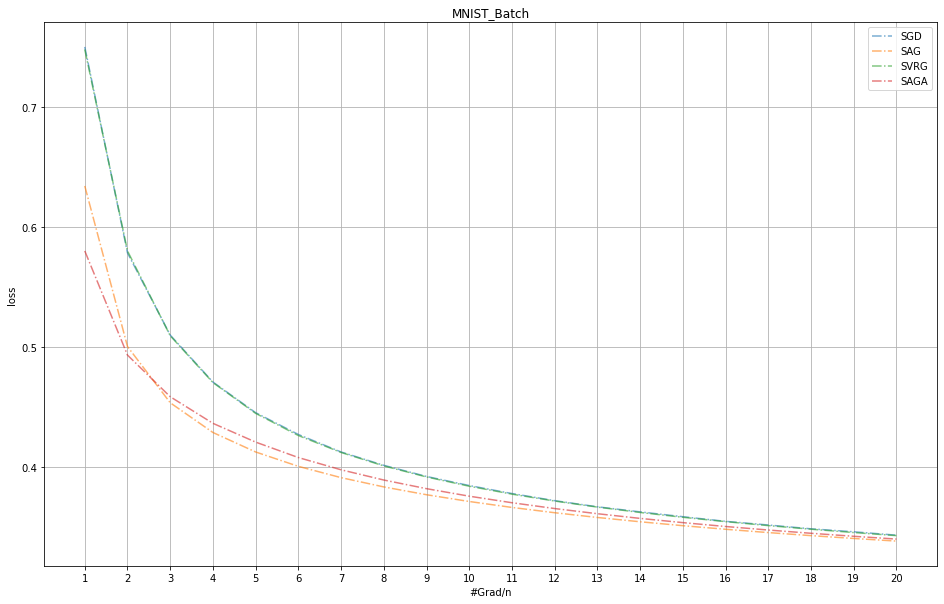

In [201]:
record_graph([record_SGD, record_SAG, record_SVRG, record_SAGA],'loss_#Grad/n')
plt.title("MNIST_Batch")
plt.savefig("plot/mnist_batch_loss.jpg")

## Experiment with Adult

In [202]:
adult_feature_train_norm.shape

(32561, 108)

In [203]:
train_data, test_data, train_label, test_label = adult_feature_train_norm, adult_feature_test_norm, adult_label_train_bi, adult_label_test_bi

In [204]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1]), array([24720,  7841]))
(array([0, 1]), array([12435,  3846]))
(32561, 108)
(16281, 108)


In [205]:
n_features = 108
n_classes = 2
np.random.seed(4212)

beta_init = np.random.normal(0,(1/(n_features*n_classes)), size=[n_classes, n_features])

In [206]:
beta_init.shape

(2, 108)

#### Optimal Results from Commercial Package

In [207]:
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(penalty='none', solver='lbfgs', fit_intercept=False, max_iter=1000, tol=1e-20)
# model.fit(train_data, np.ravel(train_label))

In [208]:
# beta_best = np.zeros(beta_init.shape)
# beta_best[0], beta_best[1] = -1*model.coef_, model.coef_
# loss_best = loss_LR(beta_best, train_data, train_label)
# print(loss_best)

### Single Version (Grad Var and Train Loss)

In [209]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 0.96 seconds, Loss: 0.3253
# Grad/N 2: 1.76 seconds, Loss: 0.3258
# Grad/N 3: 2.56 seconds, Loss: 0.3214
# Grad/N 4: 3.36 seconds, Loss: 0.3248
# Grad/N 5: 4.15 seconds, Loss: 0.3223
# Grad/N 6: 4.95 seconds, Loss: 0.3246
# Grad/N 7: 5.75 seconds, Loss: 0.3196
# Grad/N 8: 6.55 seconds, Loss: 0.3229
# Grad/N 9: 7.35 seconds, Loss: 0.3270
# Grad/N 10: 8.15 seconds, Loss: 0.3221
# Grad/N 11: 8.96 seconds, Loss: 0.3226
# Grad/N 12: 9.76 seconds, Loss: 0.3279
# Grad/N 13: 10.56 seconds, Loss: 0.3209
# Grad/N 14: 11.36 seconds, Loss: 0.3253
# Grad/N 15: 12.17 seconds, Loss: 0.3211
# Grad/N 16: 12.97 seconds, Loss: 0.3260
# Grad/N 17: 13.77 seconds, Loss: 0.3191
# Grad/N 18: 14.57 seconds, Loss: 0.3211
# Grad/N 19: 15.37 seconds, Loss: 0.3202
# Grad/N 20: 16.17 seconds, Loss: 0.3235


In [210]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.93 seconds, Loss: 0.3300
# Grad/N 2: 3.86 seconds, Loss: 0.3217
# Grad/N 3: 5.76 seconds, Loss: 0.3195
# Grad/N 4: 7.67 seconds, Loss: 0.3182
# Grad/N 5: 9.57 seconds, Loss: 0.3173
# Grad/N 6: 11.45 seconds, Loss: 0.3170
# Grad/N 7: 13.36 seconds, Loss: 0.3168
# Grad/N 8: 15.25 seconds, Loss: 0.3167
# Grad/N 9: 17.15 seconds, Loss: 0.3165
# Grad/N 10: 19.05 seconds, Loss: 0.3165
# Grad/N 11: 20.96 seconds, Loss: 0.3165
# Grad/N 12: 22.86 seconds, Loss: 0.3164
# Grad/N 13: 24.76 seconds, Loss: 0.3164
# Grad/N 14: 26.65 seconds, Loss: 0.3163
# Grad/N 15: 28.54 seconds, Loss: 0.3163
# Grad/N 16: 30.44 seconds, Loss: 0.3163
# Grad/N 17: 32.32 seconds, Loss: 0.3163
# Grad/N 18: 34.22 seconds, Loss: 0.3163
# Grad/N 19: 36.11 seconds, Loss: 0.3162
# Grad/N 20: 38.01 seconds, Loss: 0.3162


In [211]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=10, verbose = 1)

# Grad/N 1: 1.60 seconds, Loss: 0.3329
# Grad/N 2: 3.08 seconds, Loss: 0.3241
# Grad/N 3: 4.56 seconds, Loss: 0.3173
# Grad/N 4: 6.00 seconds, Loss: 0.3171
# Grad/N 5: 7.47 seconds, Loss: 0.3168
# Grad/N 6: 8.92 seconds, Loss: 0.3167
# Grad/N 7: 10.37 seconds, Loss: 0.3167
# Grad/N 8: 11.83 seconds, Loss: 0.3166
# Grad/N 9: 13.29 seconds, Loss: 0.3165
# Grad/N 10: 14.74 seconds, Loss: 0.3165
# Grad/N 11: 16.19 seconds, Loss: 0.3165
# Grad/N 12: 17.65 seconds, Loss: 0.3164
# Grad/N 13: 19.14 seconds, Loss: 0.3164
# Grad/N 14: 20.59 seconds, Loss: 0.3164
# Grad/N 15: 22.05 seconds, Loss: 0.3163
# Grad/N 16: 23.54 seconds, Loss: 0.3163
# Grad/N 17: 25.00 seconds, Loss: 0.3163
# Grad/N 18: 26.46 seconds, Loss: 0.3163
# Grad/N 19: 27.92 seconds, Loss: 0.3163
# Grad/N 20: 29.37 seconds, Loss: 0.3162


In [212]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA_single, record_SAGA_single = train_SAGA_single(train_data, train_label, beta_init, 0.01, loss_LR, loss_LR_single_grad, n_run=20, verbose = 1)

# Grad/N 1: 2.22 seconds, Loss: 0.3219
# Grad/N 2: 4.43 seconds, Loss: 0.3175
# Grad/N 3: 6.63 seconds, Loss: 0.3171
# Grad/N 4: 8.84 seconds, Loss: 0.3170
# Grad/N 5: 11.05 seconds, Loss: 0.3168
# Grad/N 6: 13.25 seconds, Loss: 0.3167
# Grad/N 7: 15.46 seconds, Loss: 0.3166
# Grad/N 8: 17.67 seconds, Loss: 0.3166
# Grad/N 9: 19.88 seconds, Loss: 0.3165
# Grad/N 10: 22.09 seconds, Loss: 0.3165
# Grad/N 11: 24.31 seconds, Loss: 0.3164
# Grad/N 12: 26.52 seconds, Loss: 0.3164
# Grad/N 13: 28.72 seconds, Loss: 0.3164
# Grad/N 14: 30.93 seconds, Loss: 0.3163
# Grad/N 15: 33.23 seconds, Loss: 0.3163
# Grad/N 16: 35.45 seconds, Loss: 0.3163
# Grad/N 17: 37.69 seconds, Loss: 0.3163
# Grad/N 18: 39.93 seconds, Loss: 0.3163
# Grad/N 19: 42.18 seconds, Loss: 0.3162
# Grad/N 20: 44.41 seconds, Loss: 0.3162


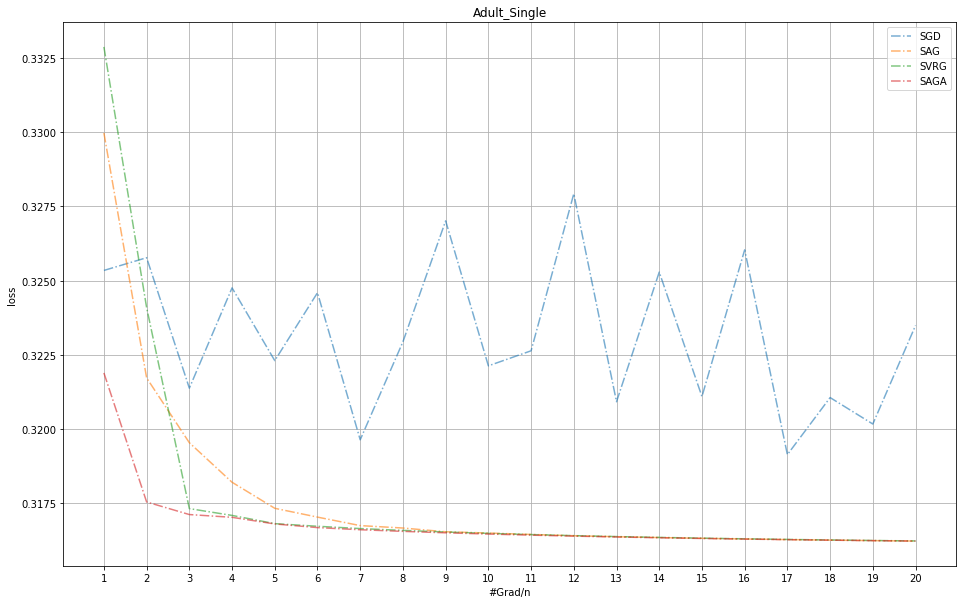

In [213]:
record_graph([record_SGD_single, record_SAG_single, record_SVRG_single, record_SAGA_single],'loss_#Grad/n')
plt.title("Adult_Single")
plt.savefig("plot/adult_single_loss.jpg")

### Minibatch Version (Test Acc)

In [214]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.32 seconds, Loss: 0.3984, Test Accuracy: 0.6956
# Grad/N 2: 0.42 seconds, Loss: 0.3714, Test Accuracy: 0.6822
# Grad/N 3: 0.52 seconds, Loss: 0.3603, Test Accuracy: 0.6764
# Grad/N 4: 0.62 seconds, Loss: 0.3535, Test Accuracy: 0.6757
# Grad/N 5: 0.72 seconds, Loss: 0.3485, Test Accuracy: 0.6732
# Grad/N 6: 0.82 seconds, Loss: 0.3449, Test Accuracy: 0.6725
# Grad/N 7: 0.92 seconds, Loss: 0.3419, Test Accuracy: 0.6727
# Grad/N 8: 1.02 seconds, Loss: 0.3394, Test Accuracy: 0.6741
# Grad/N 9: 1.12 seconds, Loss: 0.3373, Test Accuracy: 0.6713
# Grad/N 10: 1.23 seconds, Loss: 0.3356, Test Accuracy: 0.6707
# Grad/N 11: 1.33 seconds, Loss: 0.3340, Test Accuracy: 0.6700
# Grad/N 12: 1.43 seconds, Loss: 0.3327, Test Accuracy: 0.6692
# Grad/N 13: 1.53 seconds, Loss: 0.3315, Test Accuracy: 0.6686
# Grad/N 14: 1.63 seconds, Loss: 0.3306, Test Accuracy: 0.6710
# Grad/N 15: 1.73 seconds, Loss: 0.3296, Test Accuracy: 0.6684
# Grad/N 16: 1.83 seconds, Loss: 0.3288, Test Accuracy: 0.6683
#

In [215]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.11 seconds, Loss: 0.3830, Test Accuracy: 0.6946
# Grad/N 2: 0.22 seconds, Loss: 0.3657, Test Accuracy: 0.6591
# Grad/N 3: 0.33 seconds, Loss: 0.3559, Test Accuracy: 0.6681
# Grad/N 4: 0.44 seconds, Loss: 0.3500, Test Accuracy: 0.6730
# Grad/N 5: 0.55 seconds, Loss: 0.3453, Test Accuracy: 0.6692
# Grad/N 6: 0.66 seconds, Loss: 0.3419, Test Accuracy: 0.6690
# Grad/N 7: 0.77 seconds, Loss: 0.3392, Test Accuracy: 0.6711
# Grad/N 8: 0.88 seconds, Loss: 0.3370, Test Accuracy: 0.6701
# Grad/N 9: 0.99 seconds, Loss: 0.3352, Test Accuracy: 0.6694
# Grad/N 10: 1.10 seconds, Loss: 0.3336, Test Accuracy: 0.6698
# Grad/N 11: 1.21 seconds, Loss: 0.3323, Test Accuracy: 0.6699
# Grad/N 12: 1.33 seconds, Loss: 0.3311, Test Accuracy: 0.6694
# Grad/N 13: 1.44 seconds, Loss: 0.3300, Test Accuracy: 0.6692
# Grad/N 14: 1.55 seconds, Loss: 0.3291, Test Accuracy: 0.6690
# Grad/N 15: 1.66 seconds, Loss: 0.3283, Test Accuracy: 0.6688
# Grad/N 16: 1.77 seconds, Loss: 0.3276, Test Accuracy: 0.6687
#

In [216]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=10, mb_size=100)

# Grad/N 1: 0.20 seconds, Loss: 0.3984, Test Accuracy: 0.6993
# Grad/N 2: 0.31 seconds, Loss: 0.3723, Test Accuracy: 0.6840
# Grad/N 3: 0.43 seconds, Loss: 0.3606, Test Accuracy: 0.6776
# Grad/N 4: 0.54 seconds, Loss: 0.3537, Test Accuracy: 0.6748
# Grad/N 5: 0.66 seconds, Loss: 0.3488, Test Accuracy: 0.6736
# Grad/N 6: 0.78 seconds, Loss: 0.3450, Test Accuracy: 0.6727
# Grad/N 7: 0.89 seconds, Loss: 0.3420, Test Accuracy: 0.6723
# Grad/N 8: 1.01 seconds, Loss: 0.3395, Test Accuracy: 0.6714
# Grad/N 9: 1.13 seconds, Loss: 0.3374, Test Accuracy: 0.6707
# Grad/N 10: 1.24 seconds, Loss: 0.3356, Test Accuracy: 0.6703
# Grad/N 11: 1.36 seconds, Loss: 0.3340, Test Accuracy: 0.6703
# Grad/N 12: 1.47 seconds, Loss: 0.3327, Test Accuracy: 0.6697
# Grad/N 13: 1.59 seconds, Loss: 0.3315, Test Accuracy: 0.6699
# Grad/N 14: 1.71 seconds, Loss: 0.3305, Test Accuracy: 0.6697
# Grad/N 15: 1.83 seconds, Loss: 0.3295, Test Accuracy: 0.6692
# Grad/N 16: 1.94 seconds, Loss: 0.3287, Test Accuracy: 0.6692
#

In [217]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA, record_SAGA = train_SAGA(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR, loss_LR_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.11 seconds, Loss: 0.3727, Test Accuracy: 0.6790
# Grad/N 2: 0.23 seconds, Loss: 0.3595, Test Accuracy: 0.6754
# Grad/N 3: 0.34 seconds, Loss: 0.3526, Test Accuracy: 0.6736
# Grad/N 4: 0.45 seconds, Loss: 0.3479, Test Accuracy: 0.6730
# Grad/N 5: 0.57 seconds, Loss: 0.3444, Test Accuracy: 0.6722
# Grad/N 6: 0.68 seconds, Loss: 0.3415, Test Accuracy: 0.6718
# Grad/N 7: 0.80 seconds, Loss: 0.3391, Test Accuracy: 0.6712
# Grad/N 8: 0.91 seconds, Loss: 0.3371, Test Accuracy: 0.6705
# Grad/N 9: 1.02 seconds, Loss: 0.3353, Test Accuracy: 0.6701
# Grad/N 10: 1.14 seconds, Loss: 0.3338, Test Accuracy: 0.6700
# Grad/N 11: 1.25 seconds, Loss: 0.3325, Test Accuracy: 0.6698
# Grad/N 12: 1.36 seconds, Loss: 0.3313, Test Accuracy: 0.6699
# Grad/N 13: 1.48 seconds, Loss: 0.3303, Test Accuracy: 0.6694
# Grad/N 14: 1.59 seconds, Loss: 0.3294, Test Accuracy: 0.6691
# Grad/N 15: 1.71 seconds, Loss: 0.3285, Test Accuracy: 0.6688
# Grad/N 16: 1.82 seconds, Loss: 0.3278, Test Accuracy: 0.6689
#

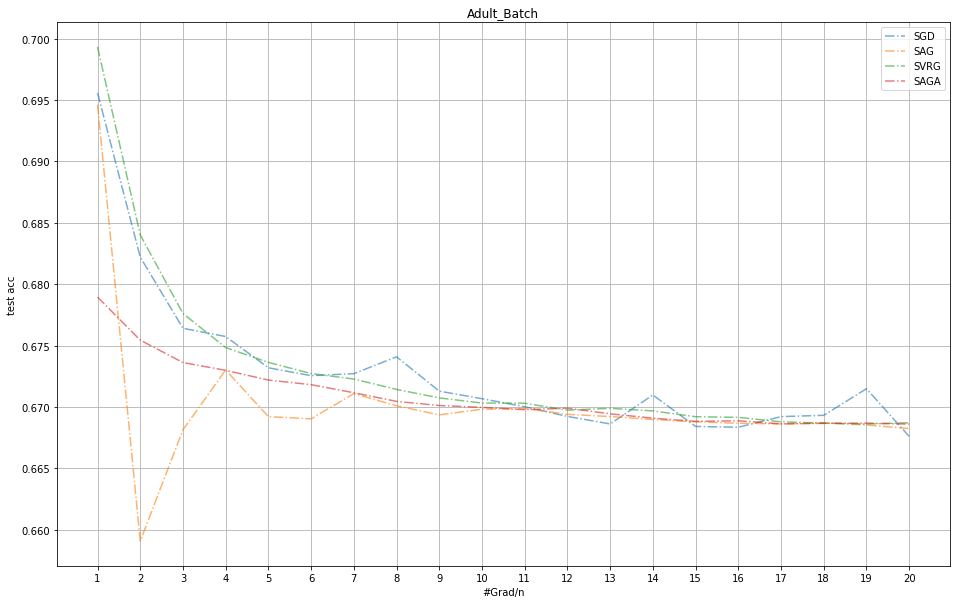

In [218]:
record_graph([record_SGD, record_SAG, record_SVRG, record_SAGA],'test_acc_#Grad/n')
plt.title("Adult_Batch")
plt.savefig("plot/adult_batch_acc.jpg")

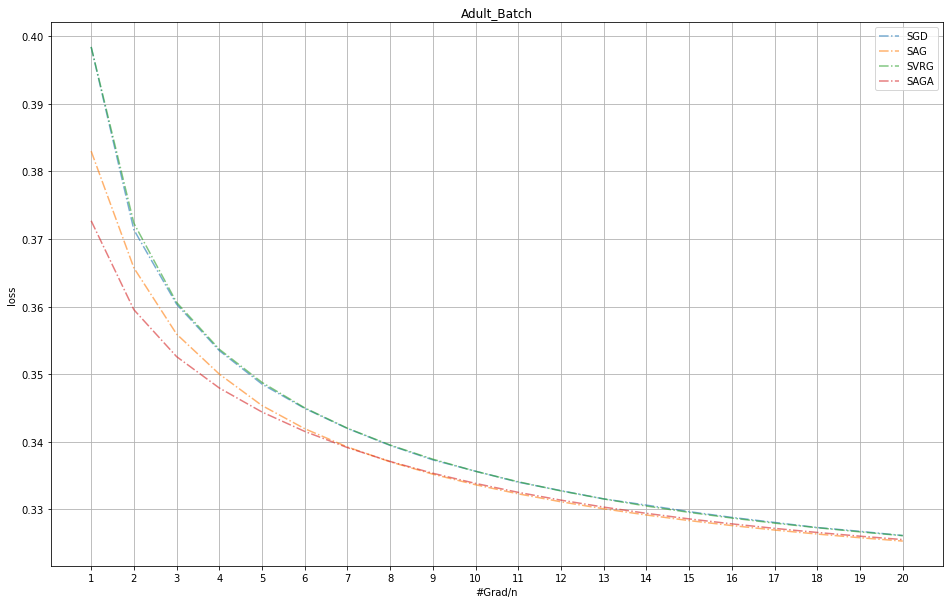

In [219]:
record_graph([record_SGD, record_SAG, record_SVRG, record_SAGA],'loss_#Grad/n')
plt.title("Adult_Batch")
plt.savefig("plot/adult_batch_loss.jpg")

# With L2-regularisation

## Experiment with Covtype

In [220]:
train_data, test_data, train_label, test_label = covtype_feature_train_norm, covtype_feature_test_norm, covtype_label_train, covtype_label_test

In [221]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1, 2, 3, 4, 5, 6]), array([158988, 212405,  26835,   2064,   7091,  13016,  15360]))
(array([0, 1, 2, 3, 4, 5, 6]), array([52852, 70896,  8919,   683,  2402,  4351,  5150]))
(435759, 54)
(145253, 54)


In [222]:
# Test with Covtype
n_features = 54
n_classes = 7
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [223]:
beta_init.shape

(7, 54)

### Single Version (Grad Var and Train Loss)

In [224]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 12.02 seconds, Loss: 1.0495
# Grad/N 2: 23.87 seconds, Loss: 1.0556
# Grad/N 3: 35.66 seconds, Loss: 1.0491
# Grad/N 4: 47.43 seconds, Loss: 1.0625
# Grad/N 5: 59.19 seconds, Loss: 1.0631
# Grad/N 6: 70.93 seconds, Loss: 1.0539
# Grad/N 7: 82.60 seconds, Loss: 1.0576
# Grad/N 8: 94.28 seconds, Loss: 1.0702
# Grad/N 9: 105.95 seconds, Loss: 1.0667
# Grad/N 10: 117.59 seconds, Loss: 1.0591
# Grad/N 11: 129.25 seconds, Loss: 1.0624
# Grad/N 12: 140.93 seconds, Loss: 1.0537
# Grad/N 13: 152.63 seconds, Loss: 1.0651
# Grad/N 14: 164.35 seconds, Loss: 1.0552
# Grad/N 15: 176.04 seconds, Loss: 1.0555
# Grad/N 16: 187.67 seconds, Loss: 1.0538
# Grad/N 17: 199.27 seconds, Loss: 1.0568
# Grad/N 18: 210.89 seconds, Loss: 1.0570
# Grad/N 19: 222.48 seconds, Loss: 1.0514
# Grad/N 20: 234.09 seconds, Loss: 1.0525


In [225]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 60.85 seconds, Loss: 1.0661
# Grad/N 2: 120.98 seconds, Loss: 1.0522
# Grad/N 3: 181.10 seconds, Loss: 1.0485
# Grad/N 4: 241.16 seconds, Loss: 1.0446
# Grad/N 5: 301.12 seconds, Loss: 1.0428
# Grad/N 6: 361.08 seconds, Loss: 1.0423
# Grad/N 7: 421.02 seconds, Loss: 1.0422
# Grad/N 8: 480.95 seconds, Loss: 1.0421
# Grad/N 9: 540.93 seconds, Loss: 1.0421
# Grad/N 10: 600.93 seconds, Loss: 1.0421
# Grad/N 11: 661.02 seconds, Loss: 1.0421
# Grad/N 12: 720.97 seconds, Loss: 1.0421
# Grad/N 13: 780.88 seconds, Loss: 1.0421
# Grad/N 14: 840.81 seconds, Loss: 1.0421
# Grad/N 15: 900.69 seconds, Loss: 1.0421
# Grad/N 16: 960.65 seconds, Loss: 1.0421
# Grad/N 17: 1020.55 seconds, Loss: 1.0421
# Grad/N 18: 1080.49 seconds, Loss: 1.0421
# Grad/N 19: 1140.45 seconds, Loss: 1.0421
# Grad/N 20: 1200.43 seconds, Loss: 1.0421


In [226]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=10, verbose = 1)

# Grad/N 1: 21.78 seconds, Loss: 1.1128
# Grad/N 2: 43.35 seconds, Loss: 1.1093
# Grad/N 3: 64.60 seconds, Loss: 1.1756
# Grad/N 4: 85.60 seconds, Loss: 1.1747
# Grad/N 5: 106.70 seconds, Loss: 1.2786
# Grad/N 6: 127.71 seconds, Loss: 1.2781
# Grad/N 7: 148.86 seconds, Loss: 1.3777
# Grad/N 8: 169.89 seconds, Loss: 1.3777
# Grad/N 9: 191.05 seconds, Loss: 1.4690
# Grad/N 10: 211.98 seconds, Loss: 1.4691
# Grad/N 11: 233.18 seconds, Loss: 1.5536
# Grad/N 12: 254.24 seconds, Loss: 1.5535
# Grad/N 13: 275.42 seconds, Loss: 1.6321
# Grad/N 14: 296.41 seconds, Loss: 1.6324
# Grad/N 15: 317.62 seconds, Loss: 1.7061
# Grad/N 16: 338.80 seconds, Loss: 1.7060
# Grad/N 17: 359.99 seconds, Loss: 1.7755
# Grad/N 18: 381.11 seconds, Loss: 1.7756
# Grad/N 19: 402.34 seconds, Loss: 1.8418
# Grad/N 20: 423.41 seconds, Loss: 1.8418


In [227]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA_single, record_SAGA_single = train_SAGA_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 64.89 seconds, Loss: 1.0454
# Grad/N 2: 128.86 seconds, Loss: 1.0430
# Grad/N 3: 192.69 seconds, Loss: 1.0427
# Grad/N 4: 256.46 seconds, Loss: 1.0424
# Grad/N 5: 320.30 seconds, Loss: 1.0423
# Grad/N 6: 384.11 seconds, Loss: 1.0421
# Grad/N 7: 448.04 seconds, Loss: 1.0422
# Grad/N 8: 511.84 seconds, Loss: 1.0421
# Grad/N 9: 575.81 seconds, Loss: 1.0421
# Grad/N 10: 639.77 seconds, Loss: 1.0421
# Grad/N 11: 703.64 seconds, Loss: 1.0421
# Grad/N 12: 767.45 seconds, Loss: 1.0421
# Grad/N 13: 831.25 seconds, Loss: 1.0421
# Grad/N 14: 895.13 seconds, Loss: 1.0421
# Grad/N 15: 958.97 seconds, Loss: 1.0421
# Grad/N 16: 1022.78 seconds, Loss: 1.0421
# Grad/N 17: 1086.63 seconds, Loss: 1.0421
# Grad/N 18: 1150.45 seconds, Loss: 1.0421
# Grad/N 19: 1214.44 seconds, Loss: 1.0421
# Grad/N 20: 1278.30 seconds, Loss: 1.0421


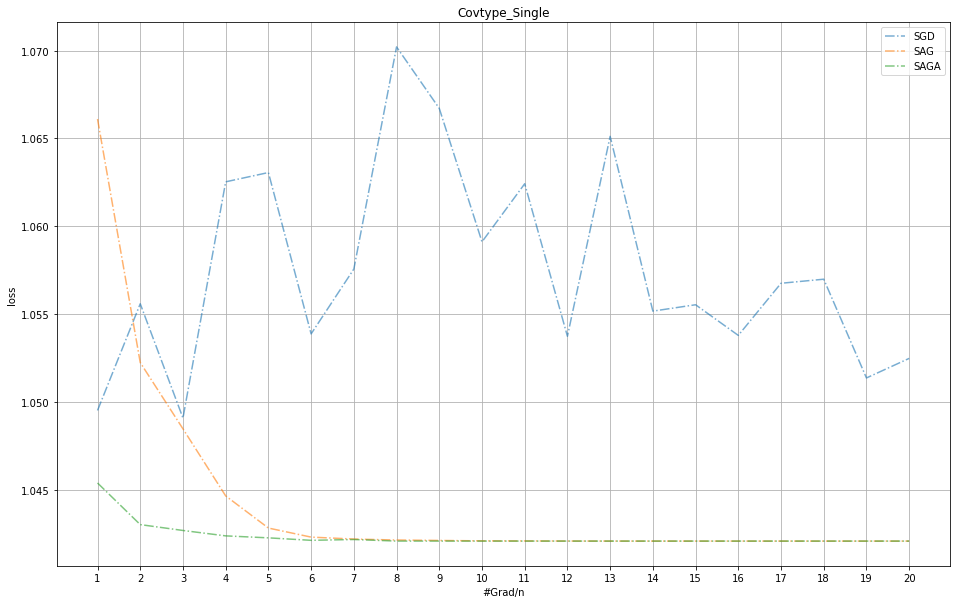

In [228]:
record_graph([record_SGD_single, record_SAG_single, record_SAGA_single],'loss_#Grad/n')
plt.title("Covtype_Single")
plt.savefig("plot/covtype_single_loss_l2.jpg")

### Minibatch Version (Test Acc)

In [229]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.18 seconds, Loss: 1.0563, Test Accuracy: 0.6877
# Grad/N 2: 2.22 seconds, Loss: 1.0442, Test Accuracy: 0.6897
# Grad/N 3: 3.27 seconds, Loss: 1.0426, Test Accuracy: 0.6896
# Grad/N 4: 4.31 seconds, Loss: 1.0423, Test Accuracy: 0.6910
# Grad/N 5: 5.36 seconds, Loss: 1.0423, Test Accuracy: 0.6897
# Grad/N 6: 6.40 seconds, Loss: 1.0423, Test Accuracy: 0.6895
# Grad/N 7: 7.44 seconds, Loss: 1.0422, Test Accuracy: 0.6898
# Grad/N 8: 8.49 seconds, Loss: 1.0423, Test Accuracy: 0.6918
# Grad/N 9: 9.53 seconds, Loss: 1.0421, Test Accuracy: 0.6897
# Grad/N 10: 10.57 seconds, Loss: 1.0424, Test Accuracy: 0.6879
# Grad/N 11: 11.62 seconds, Loss: 1.0422, Test Accuracy: 0.6895
# Grad/N 12: 12.66 seconds, Loss: 1.0422, Test Accuracy: 0.6900
# Grad/N 13: 13.70 seconds, Loss: 1.0422, Test Accuracy: 0.6895
# Grad/N 14: 14.75 seconds, Loss: 1.0422, Test Accuracy: 0.6892
# Grad/N 15: 15.79 seconds, Loss: 1.0422, Test Accuracy: 0.6903
# Grad/N 16: 16.83 seconds, Loss: 1.0422, Test Accuracy: 0

In [230]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.17 seconds, Loss: 1.0907, Test Accuracy: 0.6876
# Grad/N 2: 2.34 seconds, Loss: 1.0516, Test Accuracy: 0.6868
# Grad/N 3: 3.51 seconds, Loss: 1.0481, Test Accuracy: 0.6871
# Grad/N 4: 4.67 seconds, Loss: 1.0437, Test Accuracy: 0.6902
# Grad/N 5: 5.84 seconds, Loss: 1.0427, Test Accuracy: 0.6899
# Grad/N 6: 7.00 seconds, Loss: 1.0423, Test Accuracy: 0.6896
# Grad/N 7: 8.17 seconds, Loss: 1.0422, Test Accuracy: 0.6901
# Grad/N 8: 9.33 seconds, Loss: 1.0421, Test Accuracy: 0.6899
# Grad/N 9: 10.50 seconds, Loss: 1.0421, Test Accuracy: 0.6902
# Grad/N 10: 11.66 seconds, Loss: 1.0421, Test Accuracy: 0.6900
# Grad/N 11: 12.83 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 12: 13.99 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 13: 15.16 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 14: 16.32 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 15: 17.49 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 16: 18.66 seconds, Loss: 1.0421, Test Accuracy: 

In [231]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=10, mb_size=100)

# Grad/N 1: 1.47 seconds, Loss: 1.0563, Test Accuracy: 0.6871
# Grad/N 2: 2.72 seconds, Loss: 1.0441, Test Accuracy: 0.6901
# Grad/N 3: 4.05 seconds, Loss: 1.0424, Test Accuracy: 0.6900
# Grad/N 4: 5.29 seconds, Loss: 1.0421, Test Accuracy: 0.6900
# Grad/N 5: 6.63 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 6: 7.87 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 7: 9.21 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 8: 10.45 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 9: 11.79 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 10: 13.03 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 11: 14.36 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 12: 15.60 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 13: 16.94 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 14: 18.18 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 15: 19.52 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 16: 20.76 seconds, Loss: 1.0421, Test Accuracy:

In [232]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA, record_SAGA = train_SAGA(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 1.21 seconds, Loss: 1.0450, Test Accuracy: 0.6904
# Grad/N 2: 2.41 seconds, Loss: 1.0422, Test Accuracy: 0.6904
# Grad/N 3: 3.62 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 4: 4.83 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 5: 6.04 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 6: 7.25 seconds, Loss: 1.0421, Test Accuracy: 0.6900
# Grad/N 7: 8.46 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 8: 9.67 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 9: 10.88 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 10: 12.09 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 11: 13.30 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 12: 14.51 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 13: 15.71 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 14: 16.92 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 15: 18.13 seconds, Loss: 1.0421, Test Accuracy: 0.6901
# Grad/N 16: 19.34 seconds, Loss: 1.0421, Test Accuracy: 

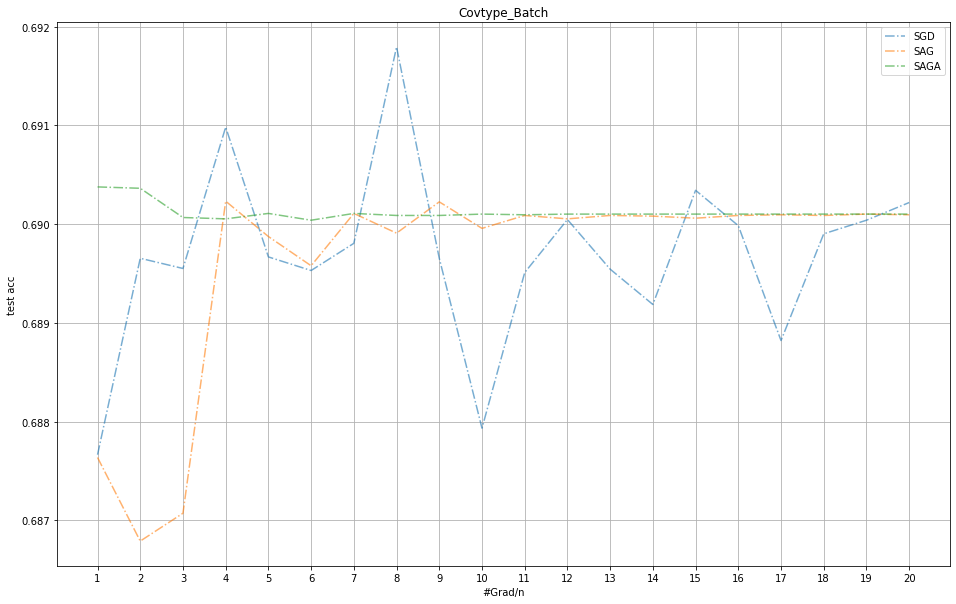

In [233]:
record_graph([record_SGD, record_SAG, record_SAGA],'test_acc_#Grad/n')
plt.title("Covtype_Batch")
plt.savefig("plot/covtype_batch_acc_l2.jpg")

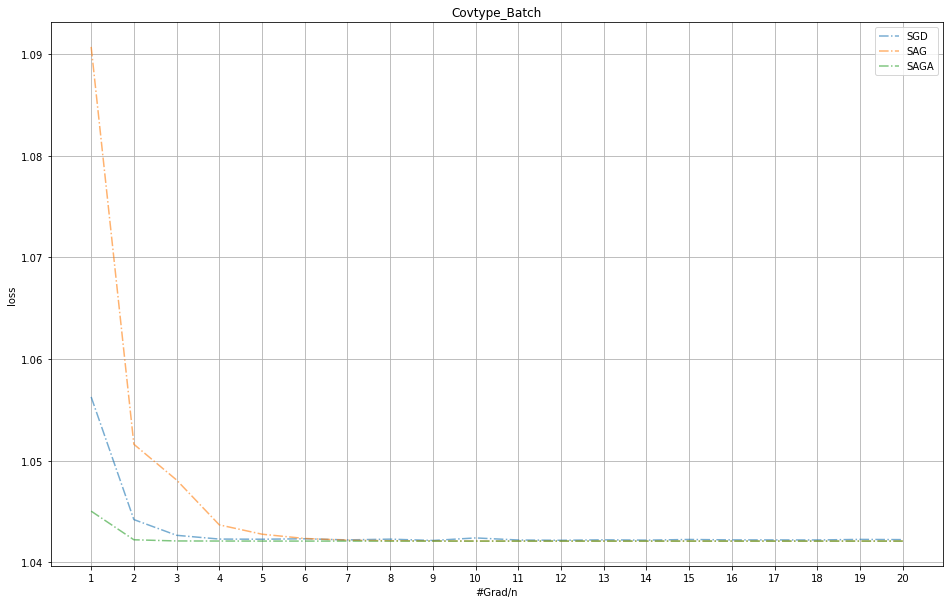

In [234]:
record_graph([record_SGD, record_SAG, record_SAGA],'loss_#Grad/n')
plt.title("Covtype_Batch")
plt.savefig("plot/covtype_batch_loss_l2.jpg")

## Experiment with IJCNN

In [235]:
ijcnn_train_data.shape

(49990, 22)

In [236]:
train_data, test_data, train_label, test_label = ijcnn_train_data, ijcnn_test_data, ijcnn_train_label, ijcnn_test_label

In [237]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1]), array([45137,  4853]))
(array([0, 1]), array([82989,  8712]))
(49990, 22)
(91701, 22)


In [238]:
n_features = 22
n_classes = 2
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [239]:
beta_init.shape

(2, 22)

### Single Version (Train Loss)

In [240]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.35 seconds, Loss: 0.3971
# Grad/N 2: 2.58 seconds, Loss: 0.3974
# Grad/N 3: 3.79 seconds, Loss: 0.3974
# Grad/N 4: 5.02 seconds, Loss: 0.3969
# Grad/N 5: 6.23 seconds, Loss: 0.3969
# Grad/N 6: 7.45 seconds, Loss: 0.3971
# Grad/N 7: 8.68 seconds, Loss: 0.3973
# Grad/N 8: 9.91 seconds, Loss: 0.3972
# Grad/N 9: 11.14 seconds, Loss: 0.3973
# Grad/N 10: 12.37 seconds, Loss: 0.3972
# Grad/N 11: 13.59 seconds, Loss: 0.3975
# Grad/N 12: 14.82 seconds, Loss: 0.3976
# Grad/N 13: 16.06 seconds, Loss: 0.3971
# Grad/N 14: 17.27 seconds, Loss: 0.3973
# Grad/N 15: 18.50 seconds, Loss: 0.3973
# Grad/N 16: 19.71 seconds, Loss: 0.3972
# Grad/N 17: 20.92 seconds, Loss: 0.3973
# Grad/N 18: 22.17 seconds, Loss: 0.3972
# Grad/N 19: 23.37 seconds, Loss: 0.3976
# Grad/N 20: 24.59 seconds, Loss: 0.3971


In [241]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 3.04 seconds, Loss: 0.4027
# Grad/N 2: 6.09 seconds, Loss: 0.3974
# Grad/N 3: 9.14 seconds, Loss: 0.3967
# Grad/N 4: 12.19 seconds, Loss: 0.3966
# Grad/N 5: 15.24 seconds, Loss: 0.3966
# Grad/N 6: 18.30 seconds, Loss: 0.3965
# Grad/N 7: 21.35 seconds, Loss: 0.3965
# Grad/N 8: 24.42 seconds, Loss: 0.3965
# Grad/N 9: 27.48 seconds, Loss: 0.3965
# Grad/N 10: 30.54 seconds, Loss: 0.3965
# Grad/N 11: 33.60 seconds, Loss: 0.3965
# Grad/N 12: 36.65 seconds, Loss: 0.3965
# Grad/N 13: 39.71 seconds, Loss: 0.3965
# Grad/N 14: 42.77 seconds, Loss: 0.3965
# Grad/N 15: 45.84 seconds, Loss: 0.3965
# Grad/N 16: 48.89 seconds, Loss: 0.3965
# Grad/N 17: 51.93 seconds, Loss: 0.3965
# Grad/N 18: 54.98 seconds, Loss: 0.3965
# Grad/N 19: 58.05 seconds, Loss: 0.3965
# Grad/N 20: 61.11 seconds, Loss: 0.3965


In [242]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=10, verbose = 1)

# Grad/N 1: 2.28 seconds, Loss: 0.4181
# Grad/N 2: 4.53 seconds, Loss: 0.4187
# Grad/N 3: 6.77 seconds, Loss: 0.4390
# Grad/N 4: 8.97 seconds, Loss: 0.4391
# Grad/N 5: 11.21 seconds, Loss: 0.4788
# Grad/N 6: 13.41 seconds, Loss: 0.4787
# Grad/N 7: 15.62 seconds, Loss: 0.5277
# Grad/N 8: 17.82 seconds, Loss: 0.5274
# Grad/N 9: 20.09 seconds, Loss: 0.5822
# Grad/N 10: 22.33 seconds, Loss: 0.5826
# Grad/N 11: 24.56 seconds, Loss: 0.6411
# Grad/N 12: 26.79 seconds, Loss: 0.6410
# Grad/N 13: 29.05 seconds, Loss: 0.7005
# Grad/N 14: 31.32 seconds, Loss: 0.7004
# Grad/N 15: 33.59 seconds, Loss: 0.7596
# Grad/N 16: 35.85 seconds, Loss: 0.7592
# Grad/N 17: 38.06 seconds, Loss: 0.8171
# Grad/N 18: 40.33 seconds, Loss: 0.8172
# Grad/N 19: 42.53 seconds, Loss: 0.8738
# Grad/N 20: 44.82 seconds, Loss: 0.8738


In [243]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA_single, record_SAGA_single = train_SAGA_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 3.54 seconds, Loss: 0.3967
# Grad/N 2: 7.07 seconds, Loss: 0.3967
# Grad/N 3: 10.60 seconds, Loss: 0.3965
# Grad/N 4: 14.13 seconds, Loss: 0.3965
# Grad/N 5: 17.66 seconds, Loss: 0.3965
# Grad/N 6: 21.17 seconds, Loss: 0.3965
# Grad/N 7: 24.70 seconds, Loss: 0.3965
# Grad/N 8: 28.21 seconds, Loss: 0.3965
# Grad/N 9: 31.72 seconds, Loss: 0.3965
# Grad/N 10: 35.23 seconds, Loss: 0.3965
# Grad/N 11: 38.73 seconds, Loss: 0.3965
# Grad/N 12: 42.24 seconds, Loss: 0.3965
# Grad/N 13: 45.75 seconds, Loss: 0.3965
# Grad/N 14: 49.25 seconds, Loss: 0.3965
# Grad/N 15: 52.76 seconds, Loss: 0.3965
# Grad/N 16: 56.26 seconds, Loss: 0.3965
# Grad/N 17: 59.83 seconds, Loss: 0.3965
# Grad/N 18: 63.37 seconds, Loss: 0.3965
# Grad/N 19: 66.97 seconds, Loss: 0.3965
# Grad/N 20: 70.53 seconds, Loss: 0.3965


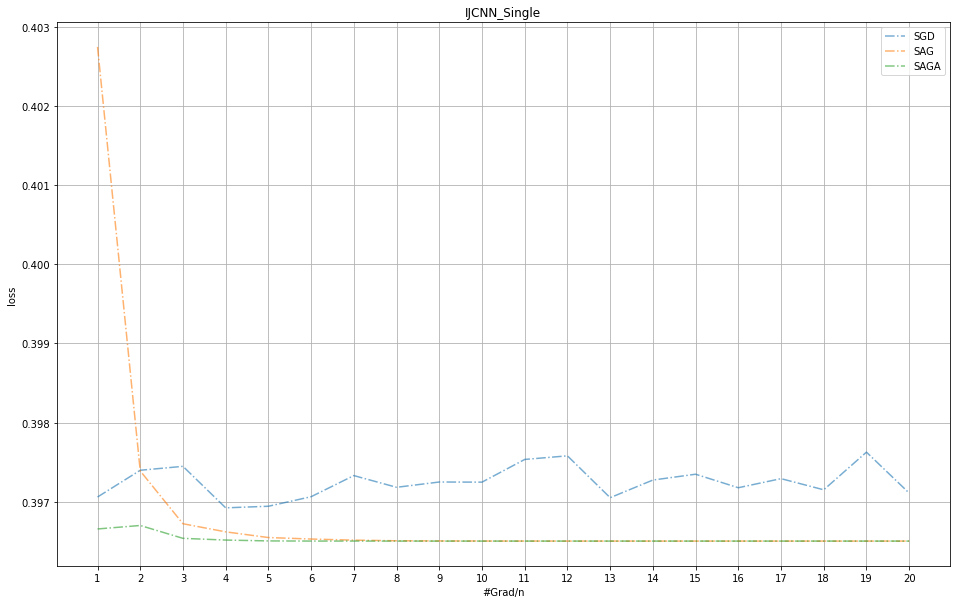

In [244]:
record_graph([record_SGD_single, record_SAG_single, record_SAGA_single],'loss_#Grad/n')
plt.title("IJCNN_Single")
plt.savefig("plot/ijcnn_single_loss_l2.jpg")

### Minibatch Version (Test Acc)

In [245]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.55 seconds, Loss: 0.5251, Test Accuracy: 0.8975
# Grad/N 2: 1.01 seconds, Loss: 0.4623, Test Accuracy: 0.9051
# Grad/N 3: 1.47 seconds, Loss: 0.4355, Test Accuracy: 0.9051
# Grad/N 4: 1.94 seconds, Loss: 0.4227, Test Accuracy: 0.9051
# Grad/N 5: 2.40 seconds, Loss: 0.4151, Test Accuracy: 0.9051
# Grad/N 6: 2.86 seconds, Loss: 0.4104, Test Accuracy: 0.9051
# Grad/N 7: 3.31 seconds, Loss: 0.4071, Test Accuracy: 0.9051
# Grad/N 8: 3.77 seconds, Loss: 0.4048, Test Accuracy: 0.9051
# Grad/N 9: 4.23 seconds, Loss: 0.4030, Test Accuracy: 0.9051
# Grad/N 10: 4.69 seconds, Loss: 0.4017, Test Accuracy: 0.9051
# Grad/N 11: 5.15 seconds, Loss: 0.4006, Test Accuracy: 0.9051
# Grad/N 12: 5.60 seconds, Loss: 0.3997, Test Accuracy: 0.9051
# Grad/N 13: 6.06 seconds, Loss: 0.3991, Test Accuracy: 0.9051
# Grad/N 14: 6.52 seconds, Loss: 0.3986, Test Accuracy: 0.9051
# Grad/N 15: 6.98 seconds, Loss: 0.3982, Test Accuracy: 0.9051
# Grad/N 16: 7.44 seconds, Loss: 0.3978, Test Accuracy: 0.9051
#

In [246]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.47 seconds, Loss: 0.5110, Test Accuracy: 0.9024
# Grad/N 2: 0.94 seconds, Loss: 0.4438, Test Accuracy: 0.9051
# Grad/N 3: 1.41 seconds, Loss: 0.4228, Test Accuracy: 0.9051
# Grad/N 4: 1.88 seconds, Loss: 0.4149, Test Accuracy: 0.9051
# Grad/N 5: 2.34 seconds, Loss: 0.4105, Test Accuracy: 0.9051
# Grad/N 6: 2.81 seconds, Loss: 0.4072, Test Accuracy: 0.9051
# Grad/N 7: 3.27 seconds, Loss: 0.4047, Test Accuracy: 0.9051
# Grad/N 8: 3.74 seconds, Loss: 0.4028, Test Accuracy: 0.9051
# Grad/N 9: 4.21 seconds, Loss: 0.4014, Test Accuracy: 0.9051
# Grad/N 10: 4.68 seconds, Loss: 0.4003, Test Accuracy: 0.9051
# Grad/N 11: 5.14 seconds, Loss: 0.3994, Test Accuracy: 0.9051
# Grad/N 12: 5.61 seconds, Loss: 0.3988, Test Accuracy: 0.9051
# Grad/N 13: 6.07 seconds, Loss: 0.3982, Test Accuracy: 0.9051
# Grad/N 14: 6.54 seconds, Loss: 0.3979, Test Accuracy: 0.9051
# Grad/N 15: 7.01 seconds, Loss: 0.3976, Test Accuracy: 0.9051
# Grad/N 16: 7.48 seconds, Loss: 0.3973, Test Accuracy: 0.9051
#

In [247]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=10, mb_size=100)

# Grad/N 1: 0.58 seconds, Loss: 0.5260, Test Accuracy: 0.8969
# Grad/N 2: 1.05 seconds, Loss: 0.4623, Test Accuracy: 0.9051
# Grad/N 3: 1.51 seconds, Loss: 0.4357, Test Accuracy: 0.9051
# Grad/N 4: 1.98 seconds, Loss: 0.4224, Test Accuracy: 0.9051
# Grad/N 5: 2.45 seconds, Loss: 0.4149, Test Accuracy: 0.9051
# Grad/N 6: 2.91 seconds, Loss: 0.4102, Test Accuracy: 0.9051
# Grad/N 7: 3.38 seconds, Loss: 0.4069, Test Accuracy: 0.9051
# Grad/N 8: 3.85 seconds, Loss: 0.4046, Test Accuracy: 0.9051
# Grad/N 9: 4.31 seconds, Loss: 0.4029, Test Accuracy: 0.9051
# Grad/N 10: 4.78 seconds, Loss: 0.4015, Test Accuracy: 0.9051
# Grad/N 11: 5.25 seconds, Loss: 0.4005, Test Accuracy: 0.9051
# Grad/N 12: 5.71 seconds, Loss: 0.3997, Test Accuracy: 0.9051
# Grad/N 13: 6.18 seconds, Loss: 0.3990, Test Accuracy: 0.9051
# Grad/N 14: 6.65 seconds, Loss: 0.3985, Test Accuracy: 0.9051
# Grad/N 15: 7.12 seconds, Loss: 0.3981, Test Accuracy: 0.9051
# Grad/N 16: 7.58 seconds, Loss: 0.3978, Test Accuracy: 0.9051
#

In [248]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA, record_SAGA = train_SAGA(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.47 seconds, Loss: 0.4707, Test Accuracy: 0.9050
# Grad/N 2: 0.94 seconds, Loss: 0.4337, Test Accuracy: 0.9051
# Grad/N 3: 1.41 seconds, Loss: 0.4210, Test Accuracy: 0.9051
# Grad/N 4: 1.89 seconds, Loss: 0.4140, Test Accuracy: 0.9051
# Grad/N 5: 2.36 seconds, Loss: 0.4097, Test Accuracy: 0.9051
# Grad/N 6: 2.83 seconds, Loss: 0.4067, Test Accuracy: 0.9051
# Grad/N 7: 3.30 seconds, Loss: 0.4044, Test Accuracy: 0.9051
# Grad/N 8: 3.77 seconds, Loss: 0.4027, Test Accuracy: 0.9051
# Grad/N 9: 4.25 seconds, Loss: 0.4014, Test Accuracy: 0.9051
# Grad/N 10: 4.72 seconds, Loss: 0.4004, Test Accuracy: 0.9051
# Grad/N 11: 5.19 seconds, Loss: 0.3996, Test Accuracy: 0.9051
# Grad/N 12: 5.66 seconds, Loss: 0.3990, Test Accuracy: 0.9051
# Grad/N 13: 6.13 seconds, Loss: 0.3985, Test Accuracy: 0.9051
# Grad/N 14: 6.60 seconds, Loss: 0.3981, Test Accuracy: 0.9051
# Grad/N 15: 7.07 seconds, Loss: 0.3978, Test Accuracy: 0.9051
# Grad/N 16: 7.54 seconds, Loss: 0.3975, Test Accuracy: 0.9051
#

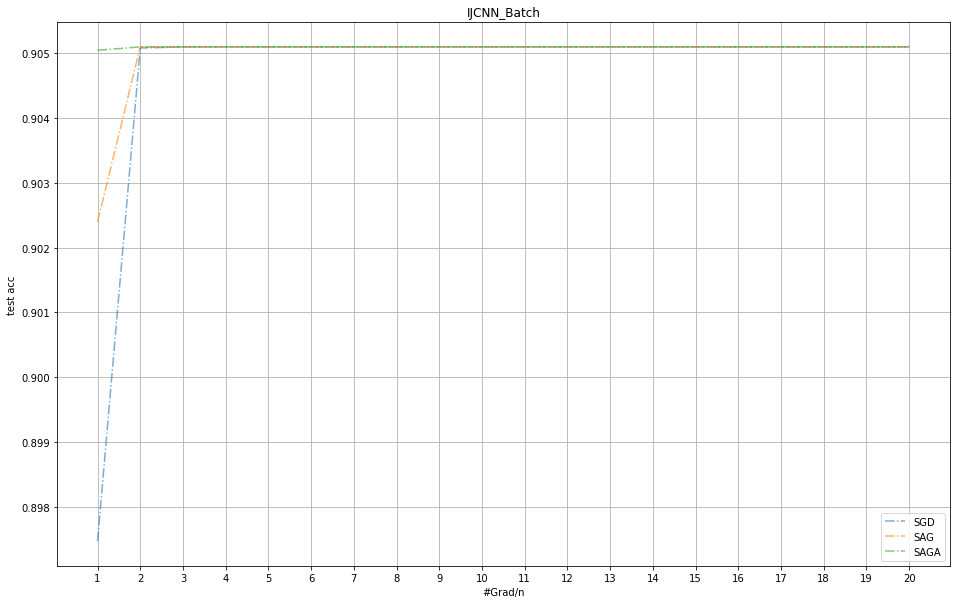

In [249]:
record_graph([record_SGD, record_SAG, record_SAGA],'test_acc_#Grad/n')
plt.title("IJCNN_Batch")
plt.savefig("plot/ijcnn_batch_acc_l2.jpg")

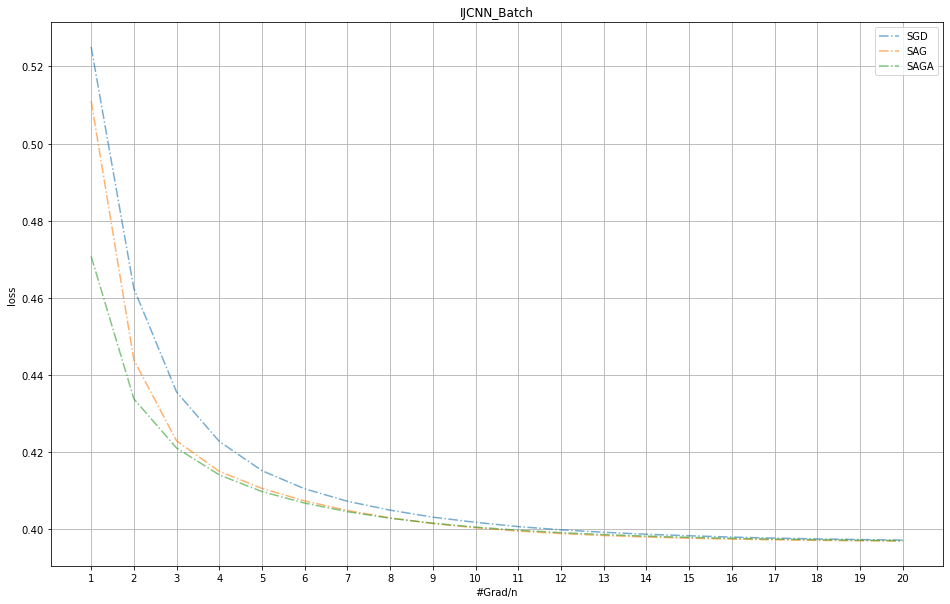

In [250]:
record_graph([record_SGD, record_SAG, record_SAGA],'loss_#Grad/n')
plt.title("IJCNN_Batch")
plt.savefig("plot/ijcnn_batch_loss_l2.jpg")

## Experiment with MNIST

In [251]:
mnist_train_images.shape

(60000, 28, 28)

In [252]:
train_data, test_data, train_label, test_label = mnist_train_images.reshape(-1,28*28), mnist_test_images.reshape(-1,28*28), mnist_train_labels, mnist_test_labels

In [253]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))
(60000, 784)
(10000, 784)


In [254]:
n_features = 28*28
n_classes = 10
np.random.seed(4212)

beta_init = np.random.normal(0,np.sqrt(1/(n_features)), size=[n_classes, n_features])

In [255]:
beta_init.shape

(10, 784)

### Single Version (Grad Var and Train Loss)

In [256]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 2.24 seconds, Loss: 0.7240
# Grad/N 2: 4.27 seconds, Loss: 0.7138
# Grad/N 3: 6.28 seconds, Loss: 0.7166
# Grad/N 4: 8.31 seconds, Loss: 0.7138
# Grad/N 5: 10.33 seconds, Loss: 0.7335
# Grad/N 6: 12.35 seconds, Loss: 0.7079
# Grad/N 7: 14.38 seconds, Loss: 0.7164
# Grad/N 8: 16.40 seconds, Loss: 0.7182
# Grad/N 9: 18.42 seconds, Loss: 0.7155
# Grad/N 10: 20.44 seconds, Loss: 0.7184
# Grad/N 11: 22.45 seconds, Loss: 0.7261
# Grad/N 12: 24.47 seconds, Loss: 0.7477
# Grad/N 13: 26.49 seconds, Loss: 0.7127
# Grad/N 14: 28.52 seconds, Loss: 0.7181
# Grad/N 15: 30.55 seconds, Loss: 0.7240
# Grad/N 16: 32.56 seconds, Loss: 0.7183
# Grad/N 17: 34.58 seconds, Loss: 0.7230
# Grad/N 18: 36.61 seconds, Loss: 0.7200
# Grad/N 19: 38.64 seconds, Loss: 0.7083
# Grad/N 20: 40.67 seconds, Loss: 0.7167


In [257]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 7.28 seconds, Loss: 0.7669
# Grad/N 2: 14.13 seconds, Loss: 0.7160
# Grad/N 3: 19.85 seconds, Loss: 0.6914
# Grad/N 4: 25.12 seconds, Loss: 0.6854
# Grad/N 5: 30.21 seconds, Loss: 0.6816
# Grad/N 6: 35.23 seconds, Loss: 0.6803
# Grad/N 7: 40.20 seconds, Loss: 0.6791
# Grad/N 8: 45.18 seconds, Loss: 0.6785
# Grad/N 9: 50.13 seconds, Loss: 0.6780
# Grad/N 10: 55.12 seconds, Loss: 0.6780
# Grad/N 11: 60.12 seconds, Loss: 0.6779
# Grad/N 12: 65.09 seconds, Loss: 0.6778
# Grad/N 13: 70.20 seconds, Loss: 0.6778
# Grad/N 14: 75.46 seconds, Loss: 0.6778
# Grad/N 15: 81.08 seconds, Loss: 0.6778
# Grad/N 16: 86.22 seconds, Loss: 0.6778
# Grad/N 17: 91.25 seconds, Loss: 0.6778
# Grad/N 18: 96.24 seconds, Loss: 0.6778
# Grad/N 19: 101.27 seconds, Loss: 0.6778
# Grad/N 20: 106.26 seconds, Loss: 0.6778


In [258]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=10, verbose = 1)

# Grad/N 1: 3.88 seconds, Loss: 0.8814
# Grad/N 2: 7.70 seconds, Loss: 0.9053
# Grad/N 3: 11.52 seconds, Loss: 0.9085
# Grad/N 4: 15.29 seconds, Loss: 0.8975
# Grad/N 5: 19.11 seconds, Loss: 0.9921
# Grad/N 6: 22.87 seconds, Loss: 0.9916
# Grad/N 7: 26.69 seconds, Loss: 1.0810
# Grad/N 8: 30.46 seconds, Loss: 1.0811
# Grad/N 9: 34.30 seconds, Loss: 1.1625
# Grad/N 10: 38.07 seconds, Loss: 1.1632
# Grad/N 11: 41.89 seconds, Loss: 1.2378
# Grad/N 12: 45.65 seconds, Loss: 1.2381
# Grad/N 13: 49.47 seconds, Loss: 1.3074
# Grad/N 14: 53.24 seconds, Loss: 1.3070
# Grad/N 15: 57.06 seconds, Loss: 1.3714
# Grad/N 16: 60.82 seconds, Loss: 1.3713
# Grad/N 17: 64.65 seconds, Loss: 1.4317
# Grad/N 18: 68.43 seconds, Loss: 1.4318
# Grad/N 19: 72.26 seconds, Loss: 1.4892
# Grad/N 20: 76.04 seconds, Loss: 1.4892


In [259]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA_single, record_SAGA_single = train_SAGA_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 6.93 seconds, Loss: 0.6901
# Grad/N 2: 14.09 seconds, Loss: 0.6827
# Grad/N 3: 21.31 seconds, Loss: 0.6802
# Grad/N 4: 27.57 seconds, Loss: 0.6788
# Grad/N 5: 33.55 seconds, Loss: 0.6782
# Grad/N 6: 39.42 seconds, Loss: 0.6778
# Grad/N 7: 45.25 seconds, Loss: 0.6778
# Grad/N 8: 51.10 seconds, Loss: 0.6778
# Grad/N 9: 56.91 seconds, Loss: 0.6778
# Grad/N 10: 62.74 seconds, Loss: 0.6778
# Grad/N 11: 68.61 seconds, Loss: 0.6778
# Grad/N 12: 75.04 seconds, Loss: 0.6778
# Grad/N 13: 81.17 seconds, Loss: 0.6778
# Grad/N 14: 87.07 seconds, Loss: 0.6778
# Grad/N 15: 92.91 seconds, Loss: 0.6778
# Grad/N 16: 98.73 seconds, Loss: 0.6778
# Grad/N 17: 104.54 seconds, Loss: 0.6778
# Grad/N 18: 110.34 seconds, Loss: 0.6778
# Grad/N 19: 116.15 seconds, Loss: 0.6778
# Grad/N 20: 122.23 seconds, Loss: 0.6778


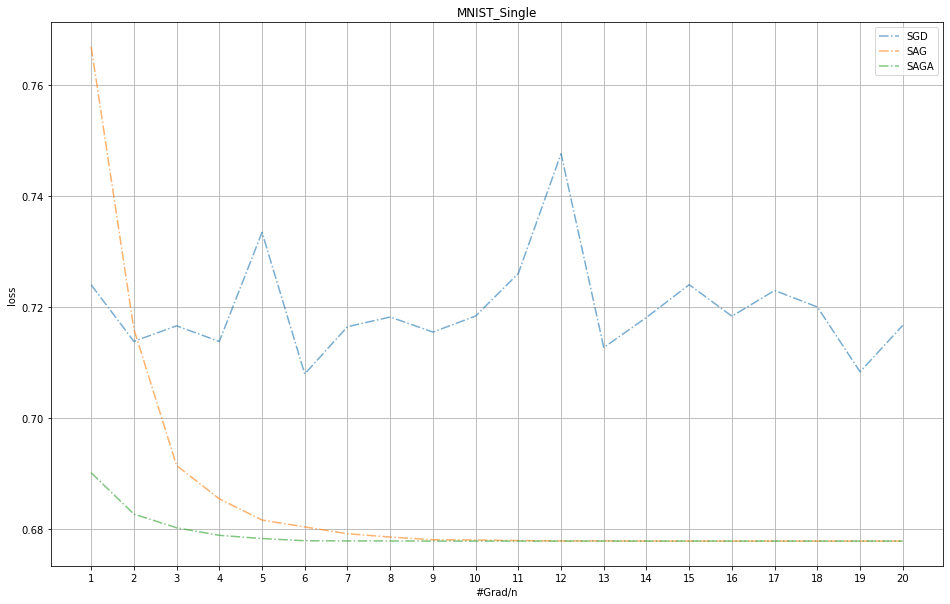

In [260]:
record_graph([record_SGD_single, record_SAG_single, record_SAGA_single],'loss_#Grad/n')
plt.title("MNIST_Single")
plt.savefig("plot/mnist_single_loss_l2.jpg")

### Minibatch Version (Test Acc)

In [261]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.43 seconds, Loss: 0.9225, Test Accuracy: 0.8507
# Grad/N 2: 0.70 seconds, Loss: 0.7933, Test Accuracy: 0.8668
# Grad/N 3: 0.95 seconds, Loss: 0.7496, Test Accuracy: 0.8774
# Grad/N 4: 1.21 seconds, Loss: 0.7272, Test Accuracy: 0.8844
# Grad/N 5: 1.48 seconds, Loss: 0.7137, Test Accuracy: 0.8868
# Grad/N 6: 1.74 seconds, Loss: 0.7050, Test Accuracy: 0.8886
# Grad/N 7: 2.00 seconds, Loss: 0.6980, Test Accuracy: 0.8902
# Grad/N 8: 2.26 seconds, Loss: 0.6934, Test Accuracy: 0.8917
# Grad/N 9: 2.52 seconds, Loss: 0.6898, Test Accuracy: 0.8938
# Grad/N 10: 2.78 seconds, Loss: 0.6875, Test Accuracy: 0.8944
# Grad/N 11: 3.04 seconds, Loss: 0.6854, Test Accuracy: 0.8956
# Grad/N 12: 3.30 seconds, Loss: 0.6836, Test Accuracy: 0.8948
# Grad/N 13: 3.55 seconds, Loss: 0.6823, Test Accuracy: 0.8952
# Grad/N 14: 3.81 seconds, Loss: 0.6815, Test Accuracy: 0.8951
# Grad/N 15: 4.07 seconds, Loss: 0.6809, Test Accuracy: 0.8952
# Grad/N 16: 4.33 seconds, Loss: 0.6802, Test Accuracy: 0.8947
#

In [262]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.29 seconds, Loss: 0.8405, Test Accuracy: 0.8431
# Grad/N 2: 0.57 seconds, Loss: 0.7714, Test Accuracy: 0.8685
# Grad/N 3: 0.86 seconds, Loss: 0.7452, Test Accuracy: 0.8819
# Grad/N 4: 1.15 seconds, Loss: 0.7238, Test Accuracy: 0.8880
# Grad/N 5: 1.43 seconds, Loss: 0.7088, Test Accuracy: 0.8906
# Grad/N 6: 1.71 seconds, Loss: 0.6994, Test Accuracy: 0.8928
# Grad/N 7: 2.00 seconds, Loss: 0.6934, Test Accuracy: 0.8940
# Grad/N 8: 2.29 seconds, Loss: 0.6893, Test Accuracy: 0.8944
# Grad/N 9: 2.57 seconds, Loss: 0.6863, Test Accuracy: 0.8943
# Grad/N 10: 2.86 seconds, Loss: 0.6841, Test Accuracy: 0.8946
# Grad/N 11: 3.15 seconds, Loss: 0.6825, Test Accuracy: 0.8949
# Grad/N 12: 3.43 seconds, Loss: 0.6813, Test Accuracy: 0.8950
# Grad/N 13: 3.72 seconds, Loss: 0.6804, Test Accuracy: 0.8950
# Grad/N 14: 4.01 seconds, Loss: 0.6798, Test Accuracy: 0.8952
# Grad/N 15: 4.29 seconds, Loss: 0.6793, Test Accuracy: 0.8952
# Grad/N 16: 4.58 seconds, Loss: 0.6789, Test Accuracy: 0.8953
#

In [263]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=10, mb_size=100)

# Grad/N 1: 0.56 seconds, Loss: 0.9206, Test Accuracy: 0.8484
# Grad/N 2: 0.96 seconds, Loss: 0.7945, Test Accuracy: 0.8689
# Grad/N 3: 1.40 seconds, Loss: 0.7490, Test Accuracy: 0.8791
# Grad/N 4: 1.80 seconds, Loss: 0.7267, Test Accuracy: 0.8835
# Grad/N 5: 2.25 seconds, Loss: 0.7131, Test Accuracy: 0.8864
# Grad/N 6: 2.65 seconds, Loss: 0.7040, Test Accuracy: 0.8891
# Grad/N 7: 3.09 seconds, Loss: 0.6976, Test Accuracy: 0.8902
# Grad/N 8: 3.49 seconds, Loss: 0.6929, Test Accuracy: 0.8916
# Grad/N 9: 3.94 seconds, Loss: 0.6894, Test Accuracy: 0.8927
# Grad/N 10: 4.34 seconds, Loss: 0.6867, Test Accuracy: 0.8939
# Grad/N 11: 4.78 seconds, Loss: 0.6847, Test Accuracy: 0.8941
# Grad/N 12: 5.18 seconds, Loss: 0.6831, Test Accuracy: 0.8945
# Grad/N 13: 5.62 seconds, Loss: 0.6819, Test Accuracy: 0.8946
# Grad/N 14: 6.02 seconds, Loss: 0.6810, Test Accuracy: 0.8949
# Grad/N 15: 6.47 seconds, Loss: 0.6803, Test Accuracy: 0.8949
# Grad/N 16: 6.86 seconds, Loss: 0.6797, Test Accuracy: 0.8949
#

In [264]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA, record_SAGA = train_SAGA(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.30 seconds, Loss: 0.7978, Test Accuracy: 0.8655
# Grad/N 2: 0.60 seconds, Loss: 0.7445, Test Accuracy: 0.8796
# Grad/N 3: 0.90 seconds, Loss: 0.7243, Test Accuracy: 0.8849
# Grad/N 4: 1.19 seconds, Loss: 0.7119, Test Accuracy: 0.8872
# Grad/N 5: 1.49 seconds, Loss: 0.7035, Test Accuracy: 0.8899
# Grad/N 6: 1.79 seconds, Loss: 0.6973, Test Accuracy: 0.8909
# Grad/N 7: 2.09 seconds, Loss: 0.6927, Test Accuracy: 0.8923
# Grad/N 8: 2.39 seconds, Loss: 0.6892, Test Accuracy: 0.8931
# Grad/N 9: 2.69 seconds, Loss: 0.6867, Test Accuracy: 0.8942
# Grad/N 10: 2.99 seconds, Loss: 0.6846, Test Accuracy: 0.8945
# Grad/N 11: 3.29 seconds, Loss: 0.6831, Test Accuracy: 0.8946
# Grad/N 12: 3.59 seconds, Loss: 0.6819, Test Accuracy: 0.8948
# Grad/N 13: 3.89 seconds, Loss: 0.6810, Test Accuracy: 0.8948
# Grad/N 14: 4.20 seconds, Loss: 0.6803, Test Accuracy: 0.8950
# Grad/N 15: 4.49 seconds, Loss: 0.6797, Test Accuracy: 0.8950
# Grad/N 16: 4.79 seconds, Loss: 0.6793, Test Accuracy: 0.8952
#

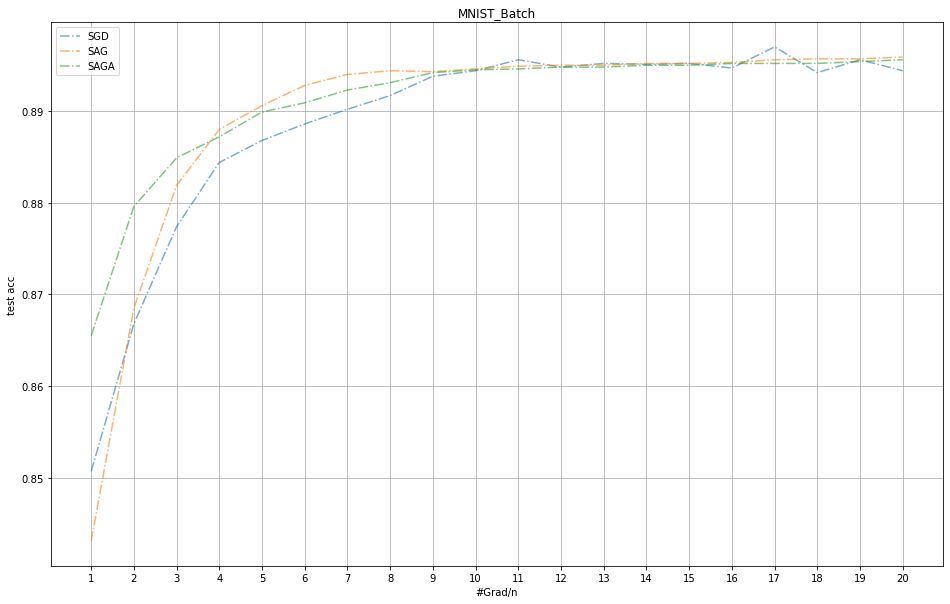

In [265]:
record_graph([record_SGD, record_SAG, record_SAGA],'test_acc_#Grad/n')
plt.title("MNIST_Batch")
plt.savefig("plot/mnist_batch_acc_l2.jpg")

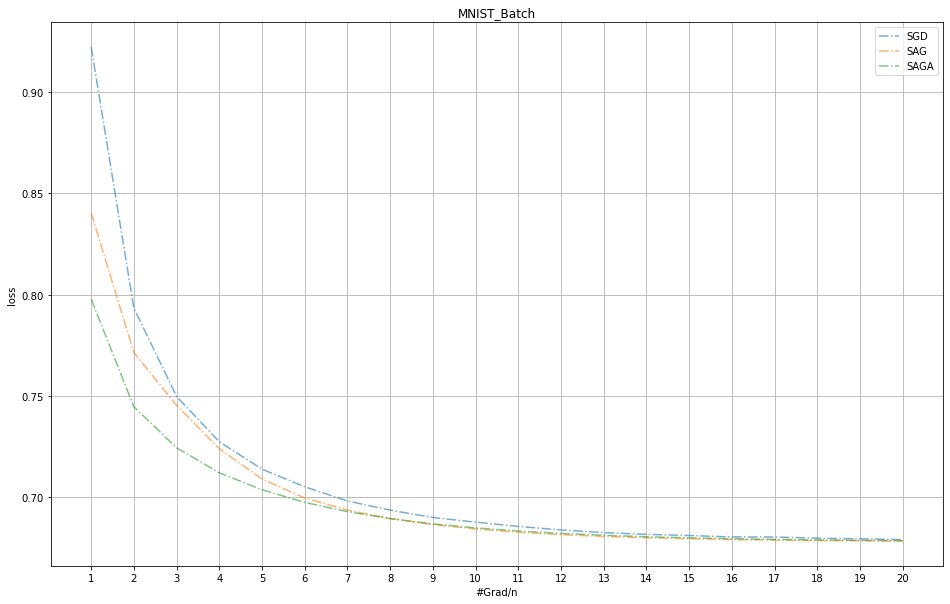

In [266]:
record_graph([record_SGD, record_SAG, record_SAGA],'loss_#Grad/n')
plt.title("MNIST_Batch")
plt.savefig("plot/mnist_batch_loss_l2.jpg")

## Experiment with Adult

In [267]:
adult_feature_train_norm.shape

(32561, 108)

In [268]:
train_data, test_data, train_label, test_label = adult_feature_train_norm, adult_feature_test_norm, adult_label_train_bi, adult_label_test_bi

In [269]:
print(np.unique(train_label, return_counts=True))
print(np.unique(test_label, return_counts=True))
print(train_data.shape)
print(test_data.shape)

(array([0, 1]), array([24720,  7841]))
(array([0, 1]), array([12435,  3846]))
(32561, 108)
(16281, 108)


In [270]:
n_features = 108
n_classes = 2
np.random.seed(4212)

beta_init = np.random.normal(0,(1/(n_features*n_classes)), size=[n_classes, n_features])

In [271]:
beta_init.shape

(2, 108)

### Single Version (Grad Var and Train Loss)

In [272]:
beta = np.copy(beta_init)

beta_SGD_single, record_SGD_single = train_SGD_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.05 seconds, Loss: 0.3734
# Grad/N 2: 1.85 seconds, Loss: 0.3752
# Grad/N 3: 2.65 seconds, Loss: 0.3704
# Grad/N 4: 3.45 seconds, Loss: 0.3739
# Grad/N 5: 4.25 seconds, Loss: 0.3718
# Grad/N 6: 5.04 seconds, Loss: 0.3750
# Grad/N 7: 5.84 seconds, Loss: 0.3687
# Grad/N 8: 6.64 seconds, Loss: 0.3739
# Grad/N 9: 7.44 seconds, Loss: 0.3759
# Grad/N 10: 8.23 seconds, Loss: 0.3710
# Grad/N 11: 9.04 seconds, Loss: 0.3726
# Grad/N 12: 9.84 seconds, Loss: 0.3815
# Grad/N 13: 10.64 seconds, Loss: 0.3710
# Grad/N 14: 11.44 seconds, Loss: 0.3751
# Grad/N 15: 12.25 seconds, Loss: 0.3707
# Grad/N 16: 13.04 seconds, Loss: 0.3750
# Grad/N 17: 13.84 seconds, Loss: 0.3685
# Grad/N 18: 14.63 seconds, Loss: 0.3700
# Grad/N 19: 15.43 seconds, Loss: 0.3704
# Grad/N 20: 16.23 seconds, Loss: 0.3756


In [273]:
# SAG
beta = np.copy(beta_init)

beta_SAG_single, record_SAG_single = train_SAG_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 1.91 seconds, Loss: 0.3748
# Grad/N 2: 3.80 seconds, Loss: 0.3690
# Grad/N 3: 5.71 seconds, Loss: 0.3681
# Grad/N 4: 7.61 seconds, Loss: 0.3675
# Grad/N 5: 9.51 seconds, Loss: 0.3668
# Grad/N 6: 11.42 seconds, Loss: 0.3665
# Grad/N 7: 13.31 seconds, Loss: 0.3664
# Grad/N 8: 15.22 seconds, Loss: 0.3663
# Grad/N 9: 17.11 seconds, Loss: 0.3663
# Grad/N 10: 19.01 seconds, Loss: 0.3663
# Grad/N 11: 20.91 seconds, Loss: 0.3663
# Grad/N 12: 22.81 seconds, Loss: 0.3663
# Grad/N 13: 24.71 seconds, Loss: 0.3663
# Grad/N 14: 26.60 seconds, Loss: 0.3663
# Grad/N 15: 28.49 seconds, Loss: 0.3663
# Grad/N 16: 30.39 seconds, Loss: 0.3663
# Grad/N 17: 32.29 seconds, Loss: 0.3663
# Grad/N 18: 34.21 seconds, Loss: 0.3663
# Grad/N 19: 36.11 seconds, Loss: 0.3663
# Grad/N 20: 38.01 seconds, Loss: 0.3663


In [274]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG_single, record_SVRG_single = train_SVRG_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=10, verbose = 1)

# Grad/N 1: 1.50 seconds, Loss: 0.3768
# Grad/N 2: 3.00 seconds, Loss: 0.3721
# Grad/N 3: 4.46 seconds, Loss: 0.3768
# Grad/N 4: 5.93 seconds, Loss: 0.3762
# Grad/N 5: 7.39 seconds, Loss: 0.3881
# Grad/N 6: 8.85 seconds, Loss: 0.3881
# Grad/N 7: 10.31 seconds, Loss: 0.3982
# Grad/N 8: 11.80 seconds, Loss: 0.3980
# Grad/N 9: 13.27 seconds, Loss: 0.4062
# Grad/N 10: 14.72 seconds, Loss: 0.4063
# Grad/N 11: 16.19 seconds, Loss: 0.4127
# Grad/N 12: 17.64 seconds, Loss: 0.4128
# Grad/N 13: 19.10 seconds, Loss: 0.4179
# Grad/N 14: 20.55 seconds, Loss: 0.4179
# Grad/N 15: 22.01 seconds, Loss: 0.4220
# Grad/N 16: 23.47 seconds, Loss: 0.4220
# Grad/N 17: 24.92 seconds, Loss: 0.4254
# Grad/N 18: 26.39 seconds, Loss: 0.4254
# Grad/N 19: 27.85 seconds, Loss: 0.4282
# Grad/N 20: 29.30 seconds, Loss: 0.4283


In [275]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA_single, record_SAGA_single = train_SAGA_single(train_data, train_label, beta_init, 0.01, loss_LR_l2, loss_LR_single_l2_grad, n_run=20, verbose = 1)

# Grad/N 1: 2.23 seconds, Loss: 0.3703
# Grad/N 2: 4.43 seconds, Loss: 0.3669
# Grad/N 3: 6.64 seconds, Loss: 0.3665
# Grad/N 4: 8.85 seconds, Loss: 0.3665
# Grad/N 5: 11.05 seconds, Loss: 0.3664
# Grad/N 6: 13.26 seconds, Loss: 0.3663
# Grad/N 7: 15.47 seconds, Loss: 0.3663
# Grad/N 8: 17.67 seconds, Loss: 0.3663
# Grad/N 9: 19.87 seconds, Loss: 0.3663
# Grad/N 10: 22.07 seconds, Loss: 0.3663
# Grad/N 11: 24.28 seconds, Loss: 0.3663
# Grad/N 12: 26.48 seconds, Loss: 0.3663
# Grad/N 13: 28.68 seconds, Loss: 0.3663
# Grad/N 14: 30.89 seconds, Loss: 0.3663
# Grad/N 15: 33.10 seconds, Loss: 0.3663
# Grad/N 16: 35.32 seconds, Loss: 0.3663
# Grad/N 17: 37.54 seconds, Loss: 0.3663
# Grad/N 18: 39.76 seconds, Loss: 0.3663
# Grad/N 19: 41.97 seconds, Loss: 0.3663
# Grad/N 20: 44.19 seconds, Loss: 0.3663


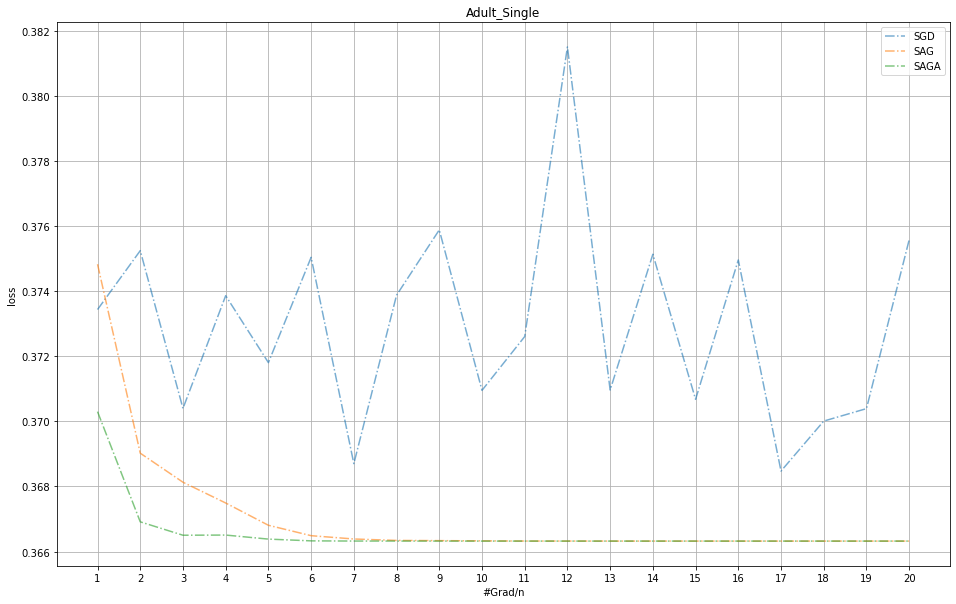

In [276]:
record_graph([record_SGD_single, record_SAG_single, record_SAGA_single],'loss_#Grad/n')
plt.title("Adult_Single")
plt.savefig("plot/adult_single_loss_l2.jpg")

### Minibatch Version (Test Acc)

In [277]:
beta = np.copy(beta_init)

beta_SGD, record_SGD = train_SGD(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.20 seconds, Loss: 0.4075, Test Accuracy: 0.6963
# Grad/N 2: 0.29 seconds, Loss: 0.3859, Test Accuracy: 0.6846
# Grad/N 3: 0.39 seconds, Loss: 0.3785, Test Accuracy: 0.6790
# Grad/N 4: 0.49 seconds, Loss: 0.3746, Test Accuracy: 0.6786
# Grad/N 5: 0.59 seconds, Loss: 0.3721, Test Accuracy: 0.6766
# Grad/N 6: 0.69 seconds, Loss: 0.3706, Test Accuracy: 0.6755
# Grad/N 7: 0.79 seconds, Loss: 0.3695, Test Accuracy: 0.6765
# Grad/N 8: 0.89 seconds, Loss: 0.3687, Test Accuracy: 0.6782
# Grad/N 9: 0.98 seconds, Loss: 0.3681, Test Accuracy: 0.6762
# Grad/N 10: 1.08 seconds, Loss: 0.3677, Test Accuracy: 0.6753
# Grad/N 11: 1.18 seconds, Loss: 0.3674, Test Accuracy: 0.6752
# Grad/N 12: 1.28 seconds, Loss: 0.3671, Test Accuracy: 0.6747
# Grad/N 13: 1.38 seconds, Loss: 0.3670, Test Accuracy: 0.6736
# Grad/N 14: 1.48 seconds, Loss: 0.3669, Test Accuracy: 0.6764
# Grad/N 15: 1.57 seconds, Loss: 0.3668, Test Accuracy: 0.6741
# Grad/N 16: 1.67 seconds, Loss: 0.3667, Test Accuracy: 0.6744
#

In [278]:
# SAG
beta = np.copy(beta_init)

beta_SAG, record_SAG = train_SAG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.11 seconds, Loss: 0.3945, Test Accuracy: 0.6944
# Grad/N 2: 0.21 seconds, Loss: 0.3838, Test Accuracy: 0.6596
# Grad/N 3: 0.32 seconds, Loss: 0.3767, Test Accuracy: 0.6714
# Grad/N 4: 0.43 seconds, Loss: 0.3729, Test Accuracy: 0.6760
# Grad/N 5: 0.54 seconds, Loss: 0.3704, Test Accuracy: 0.6723
# Grad/N 6: 0.64 seconds, Loss: 0.3691, Test Accuracy: 0.6737
# Grad/N 7: 0.75 seconds, Loss: 0.3683, Test Accuracy: 0.6764
# Grad/N 8: 0.86 seconds, Loss: 0.3677, Test Accuracy: 0.6752
# Grad/N 9: 0.97 seconds, Loss: 0.3673, Test Accuracy: 0.6747
# Grad/N 10: 1.07 seconds, Loss: 0.3671, Test Accuracy: 0.6752
# Grad/N 11: 1.18 seconds, Loss: 0.3669, Test Accuracy: 0.6749
# Grad/N 12: 1.29 seconds, Loss: 0.3668, Test Accuracy: 0.6745
# Grad/N 13: 1.40 seconds, Loss: 0.3667, Test Accuracy: 0.6746
# Grad/N 14: 1.50 seconds, Loss: 0.3666, Test Accuracy: 0.6746
# Grad/N 15: 1.61 seconds, Loss: 0.3665, Test Accuracy: 0.6743
# Grad/N 16: 1.72 seconds, Loss: 0.3665, Test Accuracy: 0.6742
#

In [279]:
# SVRG
beta = np.copy(beta_init)

beta_SVRG, record_SVRG = train_SVRG(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=10, mb_size=100)

# Grad/N 1: 0.20 seconds, Loss: 0.4074, Test Accuracy: 0.7001
# Grad/N 2: 0.31 seconds, Loss: 0.3867, Test Accuracy: 0.6865
# Grad/N 3: 0.43 seconds, Loss: 0.3787, Test Accuracy: 0.6799
# Grad/N 4: 0.54 seconds, Loss: 0.3746, Test Accuracy: 0.6777
# Grad/N 5: 0.66 seconds, Loss: 0.3722, Test Accuracy: 0.6769
# Grad/N 6: 0.77 seconds, Loss: 0.3706, Test Accuracy: 0.6757
# Grad/N 7: 0.88 seconds, Loss: 0.3694, Test Accuracy: 0.6751
# Grad/N 8: 0.99 seconds, Loss: 0.3686, Test Accuracy: 0.6751
# Grad/N 9: 1.11 seconds, Loss: 0.3681, Test Accuracy: 0.6751
# Grad/N 10: 1.22 seconds, Loss: 0.3676, Test Accuracy: 0.6751
# Grad/N 11: 1.33 seconds, Loss: 0.3673, Test Accuracy: 0.6753
# Grad/N 12: 1.44 seconds, Loss: 0.3671, Test Accuracy: 0.6753
# Grad/N 13: 1.56 seconds, Loss: 0.3669, Test Accuracy: 0.6751
# Grad/N 14: 1.67 seconds, Loss: 0.3668, Test Accuracy: 0.6748
# Grad/N 15: 1.78 seconds, Loss: 0.3667, Test Accuracy: 0.6748
# Grad/N 16: 1.89 seconds, Loss: 0.3666, Test Accuracy: 0.6746
#

In [280]:
# SAGA
beta = np.copy(beta_init)

beta_SAGA, record_SAGA = train_SAGA(train_data, train_label, test_data, test_label, beta_init, 0.01, loss_LR_l2, loss_LR_l2_grad, verbose = 1, n_run=20, mb_size=100)

# Grad/N 1: 0.11 seconds, Loss: 0.3866, Test Accuracy: 0.6803
# Grad/N 2: 0.22 seconds, Loss: 0.3779, Test Accuracy: 0.6781
# Grad/N 3: 0.33 seconds, Loss: 0.3740, Test Accuracy: 0.6764
# Grad/N 4: 0.44 seconds, Loss: 0.3718, Test Accuracy: 0.6760
# Grad/N 5: 0.55 seconds, Loss: 0.3703, Test Accuracy: 0.6752
# Grad/N 6: 0.66 seconds, Loss: 0.3693, Test Accuracy: 0.6749
# Grad/N 7: 0.77 seconds, Loss: 0.3685, Test Accuracy: 0.6750
# Grad/N 8: 0.88 seconds, Loss: 0.3680, Test Accuracy: 0.6750
# Grad/N 9: 0.99 seconds, Loss: 0.3676, Test Accuracy: 0.6752
# Grad/N 10: 1.11 seconds, Loss: 0.3673, Test Accuracy: 0.6752
# Grad/N 11: 1.22 seconds, Loss: 0.3671, Test Accuracy: 0.6754
# Grad/N 12: 1.33 seconds, Loss: 0.3669, Test Accuracy: 0.6751
# Grad/N 13: 1.44 seconds, Loss: 0.3668, Test Accuracy: 0.6748
# Grad/N 14: 1.55 seconds, Loss: 0.3667, Test Accuracy: 0.6747
# Grad/N 15: 1.66 seconds, Loss: 0.3666, Test Accuracy: 0.6746
# Grad/N 16: 1.77 seconds, Loss: 0.3665, Test Accuracy: 0.6745
#

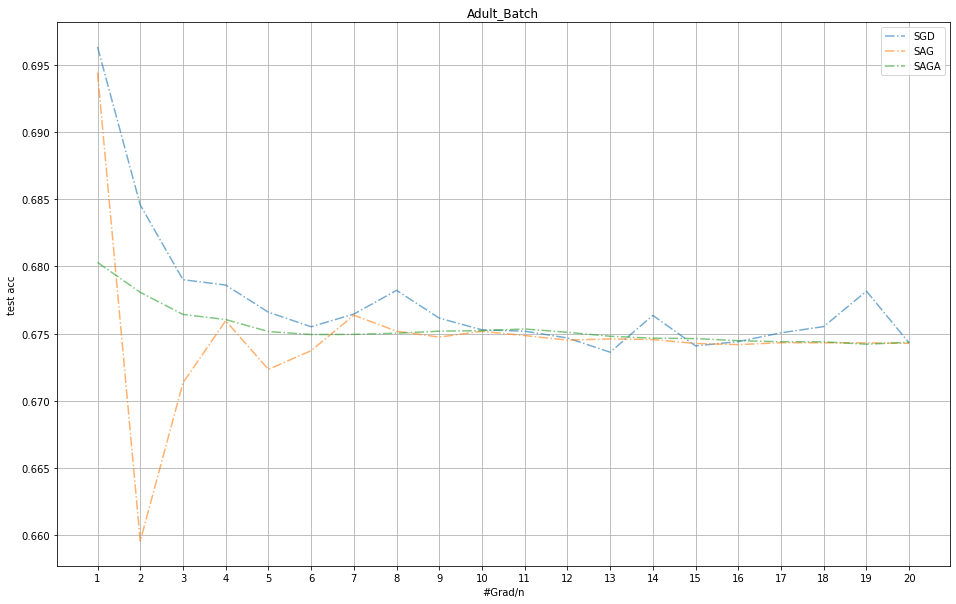

In [281]:
record_graph([record_SGD, record_SAG, record_SAGA],'test_acc_#Grad/n')
plt.title("Adult_Batch")
plt.savefig("plot/adult_batch_acc_l2.jpg")

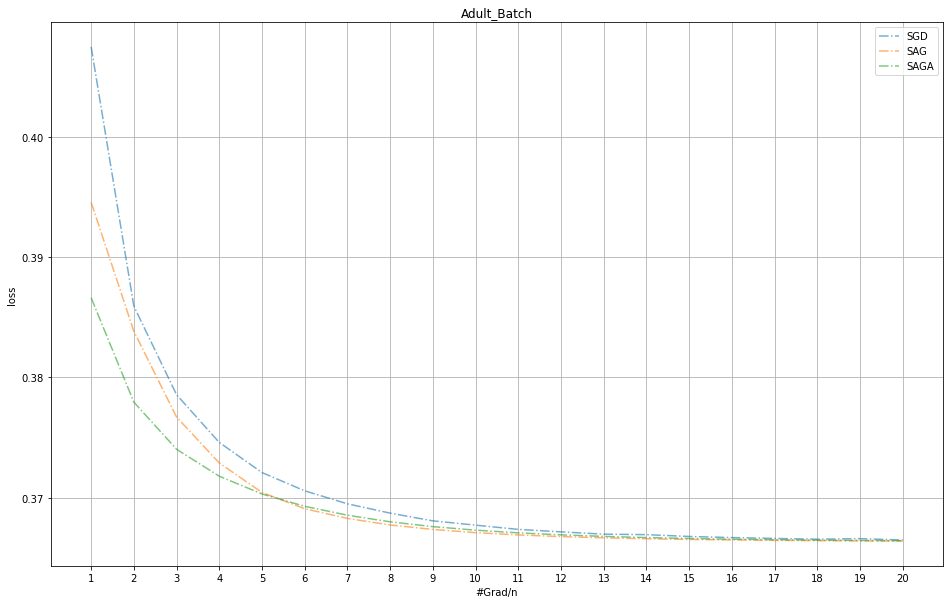

In [282]:
record_graph([record_SGD, record_SAG, record_SAGA],'loss_#Grad/n')
plt.title("Adult_Batch")
plt.savefig("plot/adult_batch_loss_l2.jpg")

# The End